###### Importing Required Libraries

In [1]:
from bs4 import BeautifulSoup
import requests 
import csv 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

###### Data Scraping

In [ ]:
Title = []
Monthly_Charges=[]
amenities = []


for i in range(1,30):
    url = 'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Residential-House,Villa&cityName=Hyderabad&page={}'.format(i)     
    response = requests.get(url)    
    soup = BeautifulSoup(response.content)
    
    title=soup.find_all('h2',class_='mb-srp__card--title')    
    for t in title:
        Title.append(t.text)
        
    amount=soup.find_all("div",class_="mb-srp__card__price--amount")

    for i in amount:
        Monthly_Charges.append(i.text)

    for i in soup.find_all('div',class_ = 'mb-srp__card__summary__list'):
        amenities.append(i.text)

Check the length of extracted lists

In [ ]:
print(len(Title))
print(len(Monthly_Charges))
print(len(amenities))

870
870
870


Taking look at the first record

In [ ]:
print(amenities)
amenities[0]

['FurnishingSemi-FurnishedTenant PreferredBachelors/FamilyCar Parking1 CoveredAvailabilityImmediatelyCarpet Area1318 sqftFloor1 out of 5facingWestoverlookingMain RoadBathroom3Balcony2', 'FurnishingUnfurnishedTenant PreferredFamilyAvailabilityImmediatelyCarpet Area1280 sqftFloor15 out of 18facingEastoverlookingGarden/ParkBathroom2Balcony1', 'FurnishingSemi-FurnishedTenant PreferredFamilyCar Parking1 CoveredAvailabilityImmediatelySuper Area1135 sqftFloor1 out of 7facingSouth - EastBathroom2Balcony2', 'FurnishingSemi-FurnishedTenant PreferredFamilyCar Parking2 CoveredAvailabilityImmediatelyCarpet Area1585 sqftFloor9 out of 11facingWestoverlookingGarden/Park, PoolBathroom2Balcony2', 'FurnishingSemi-FurnishedTenant PreferredBachelors/FamilyCar Parking2 Covered, 2 OpenAvailabilityImmediatelyCarpet Area4541 sqftfacingNorth - EastoverlookingGarden/Park, Pool, Main RoadDimensions1 X 415 yrd SqyrdBathroom4Balcony2', 'FurnishingUnfurnishedTenant PreferredBachelors/FamilyCar Parking1 CoveredAvaila

'FurnishingSemi-FurnishedTenant PreferredBachelors/FamilyCar Parking1 CoveredAvailabilityImmediatelyCarpet Area1318 sqftFloor1 out of 5facingWestoverlookingMain RoadBathroom3Balcony2'

In [ ]:
print(Title)


['3 BHK Apartment for Rent in Masjid Banda', '2 BHK Apartment for Rent in Hitech City', '2 BHK Apartment for Rent in Kukatpally, NH 9', '2 BHK Apartment for Rent in Financial District, Nanakram Guda', '4 BHK Villa for Rent in Gachibowli Phase 3, Outer Ring Road', '3 BHK Apartment for Rent in Narsingi, Outer Ring Road', '2 BHK Apartment for Rent in Hitech City', '2 BHK Penthouse for Rent in Banjara Hills, NH 9', '3 BHK Apartment for Rent in Appa junction', '4 BHK Villa for Rent in Shamshabad', '4 BHK Villa for Rent in Narsingi, Outer Ring Road', '3 BHK Apartment for Rent in Shaikpet', '3 BHK Apartment for Rent in Sri Nagar Colony', '3 BHK Apartment for Rent in Raghavendra Nagar, Hayathnagar, NH 9', '2 BHK Apartment for Rent in Madinaguda, Hafeezpet, NH 9', '2 BHK Apartment for Rent in Nizampet', '1 BHK House for Rent in Gandhinagar-Indira Park Road', '3 BHK House for Rent in Neredmet', '3 BHK Apartment for Rent in Kondapur', '3 BHK Apartment for Rent in Chandanagar, NH 9', '2 BHK House 

In [ ]:
Title[3]

'2 BHK Apartment for Rent in Financial District, Nanakram Guda'

In [ ]:
amenities[3]

'FurnishingSemi-FurnishedTenant PreferredBachelors/FamilyCar Parking1 OpenAvailabilityImmediatelyCarpet Area1000 sqftFloor2 out of 3facingEastoverlookingMain RoadBathroom2Balcony2'

######  Creating DataFrame

In [ ]:
d = {'Title':Title,
     'Amenities':amenities,
     'Amount':Monthly_Charges
       }

In [ ]:
data = pd.DataFrame(d)
data

,Title,Amenities,Amount
0,3 BHK Apartment for Rent in Masjid Banda,FurnishingSemi-FurnishedTenant PreferredBachel...,"₹18,000"
1,2 BHK Apartment for Rent in Hitech City,FurnishingUnfurnishedTenant PreferredFamilyAva...,"₹39,500"
2,"2 BHK Apartment for Rent in Kukatpally, NH 9",FurnishingSemi-FurnishedTenant PreferredFamily...,"₹23,000"
3,2 BHK Apartment for Rent in Financial District...,FurnishingSemi-FurnishedTenant PreferredFamily...,"₹35,000"
4,"4 BHK Villa for Rent in Gachibowli Phase 3, Ou...",FurnishingSemi-FurnishedTenant PreferredBachel...,₹2 Lac
...,...,...,...
865,2 BHK Apartment for Rent in Friends Colony,FurnishingUnfurnishedTenant PreferredFamilyCar...,"₹15,000"
866,"1 BHK Apartment for Rent in Somajiguda, NH 9",FurnishingUnfurnishedTenant PreferredBachelors...,"₹10,000"
867,"2 BHK Apartment for Rent in Sun City, Bandlagu...",FurnishingFurnishedTenant PreferredBachelorsAv...,"₹15,000"
868,2 BHK Apartment for Rent in Serilingampally,FurnishingFurnishedTenant PreferredBachelors/F...,"₹14,700"


##### Saving data in csv file

In [ ]:
data.to_csv(r"./magicbrics3.csv")

In [544]:
data = pd.read_csv('magicbrics3.csv')
data


,Unnamed: 0,Title,Amenities,Amount
0,0,3 BHK Apartment for Rent in Masjid Banda,FurnishingSemi-FurnishedTenant PreferredBachel...,"₹18,000"
1,1,2 BHK Apartment for Rent in Hitech City,FurnishingUnfurnishedTenant PreferredFamilyAva...,"₹39,500"
2,2,"2 BHK Apartment for Rent in Kukatpally, NH 9",FurnishingSemi-FurnishedTenant PreferredFamily...,"₹23,000"
3,3,2 BHK Apartment for Rent in Financial District...,FurnishingSemi-FurnishedTenant PreferredFamily...,"₹35,000"
4,4,"4 BHK Villa for Rent in Gachibowli Phase 3, Ou...",FurnishingSemi-FurnishedTenant PreferredBachel...,₹2 Lac
...,...,...,...,...
865,865,2 BHK Apartment for Rent in Friends Colony,FurnishingUnfurnishedTenant PreferredFamilyCar...,"₹15,000"
866,866,"1 BHK Apartment for Rent in Somajiguda, NH 9",FurnishingUnfurnishedTenant PreferredBachelors...,"₹10,000"
867,867,"2 BHK Apartment for Rent in Sun City, Bandlagu...",FurnishingFurnishedTenant PreferredBachelorsAv...,"₹15,000"
868,868,2 BHK Apartment for Rent in Serilingampally,FurnishingFurnishedTenant PreferredBachelors/F...,"₹14,700"


### Data Cleaning


###### Creating **Furnished** column

In [545]:
data['Furnished_Type'] = data['Amenities'].apply(lambda x:x.split('Tenant')[0].replace('Furnishing','') )

In [546]:
data['Furnished_Type']=data['Furnished_Type'].replace('', "Unknown",regex=True)


In [547]:
data['Furnished_Type'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished', 'Unknown'],
      dtype=object)

###### Creating **Tentant_preferred** column

In [548]:
data['Tenants_Preferred'] = data['Amenities'].apply(lambda x:'/'.join(re.findall(r'Bachelors|Family|Bachelors/Family',x)))

In [549]:
data['Tenants_Preferred'].unique()

array(['Bachelors/Family', 'Family', 'Bachelors'], dtype=object)

###### Creating **Sqft** column

In [550]:
data['Sqft'] = data['Amenities'].apply(lambda x: x.split('Area')[1].split()[0] if 'Area' in x else np.nan )

In [551]:
d=[]
for i in data["Sqft"]:
    if ',' in str(i):
        d.append(i.replace(',',''))
    else:
        d.append(i)

In [552]:
data["Sqft"]=d

In [553]:
data['Sqft'] .unique()

array(['1318', '1280', '1135', '1585', '4541', '1345', '900', '1650',
       '1413', '1750', '160', '1100', '1530', '1625', '1000', '1259',
       '800', '1500', '1865', '1300', '1200', '1720', '4000', '1400',
       '960', '3000', '1800', '3131', '2500', '1510', '1050', '2600',
       '2800', '950', '2200', '2400', '2750', '1450', '3380', '2410',
       '4500', '2395', '3545', '1590', '1435', '500', '1150', '3045',
       '1520', '1645', '3600', '3395', '4200', '1275', '2250', '2595',
       '11000', '2000', '1350', '1600', '540', '5000', '2490', '2136',
       '3925', '2350', '750', '3900', '1490', '1283', '1214', '700',
       '1025', '1121', '2890', '1040', '1290', '850', '1850', '1120',
       '1840', '3050', '16000', '2417', '400', '80', '2018', '6050',
       '600', '1700', '250', '2700', '1370', '1528', '1825', '1550',
       '1875', '5200', '928', '3872', '5800', '2300', '1950', '2275',
       '2080', '2430', '1460', '2150', '1920', '3006', '2100', '1575',
       '3315', '1844

###### Creating **property_type** column

In [554]:
data['Property_type'] = data['Title'].apply(lambda x: x.split('BHK')[1].split()[0] if 'BHK' in x else "Unknown")


In [555]:
data['Property_type']=data['Property_type'].str.replace('Builder','Apartment')

In [556]:
data['Property_type'].unique()

array(['Apartment', 'Villa', 'Penthouse', 'House', 'Unknown'],
      dtype=object)

###### Creating BHK column

In [557]:

data["BHK"]=data["Title"].apply(lambda x:x.split("BHK")[0].replace("> 10","11") if " BHK" in x else np.nan)


In [558]:
data["BHK"].unique()

array(['3 ', '2 ', '4 ', '1 ', '5 ', nan, '11 ', '10 ', '6 ', '7 '],
      dtype=object)

###### Creating **Location** column

In [559]:
data['Location'] = data['Title'].apply(lambda x: x.split("in ")[1] )


In [560]:
location=[]
for i in data["Location"]:
    #print(i)
    l1=i.split(",")[0]
    #l2=i.split(",")[1]
    location.append(l1)

In [561]:
data["Location"]=location

In [562]:
data['Location'].unique()

array(['Masjid Banda', 'Hitech City', 'Kukatpally', 'Financial District',
       'Gachibowli Phase 3', 'Narsingi', 'Banjara Hills', 'Appa junction',
       'Shamshabad', 'Shaikpet', 'Sri Nagar Colony', 'Raghavendra Nagar',
       'Madinaguda', 'Nizampet', 'Gandhinagar-Indira Park Road',
       'Neredmet', 'Kondapur', 'Chandanagar', 'Tarnaka', 'CMC Enclave',
       'Vasantha Nagar', 'Quthbullapur', 'Tellapur', 'Ram Koti',
       'Upparpally', 'Gundlapochampally', 'Yapral', 'Mythri Nagar',
       'Jayabharathi gardens', 'Kokapet', 'Mallapur', 'Pragathi Nagar',
       'Saidabad Colony', 'Bandam Kommu', 'DD Colony', 'Balanagar',
       'Kachiguda', 'Chilka Nagar', 'Serilingampally', 'Masab Tank',
       'Rampally', 'Lakdikapul', 'Gachibowli', 'Himayath Nagar',
       'Jubilee Hills', 'Phase 2', 'Film Nagar', 'Saroornagar', 'Miyapur',
       'Asif Nagar', 'Manikonda', 'Ramchandrapuram Mandal',
       'Nanakram Guda', 'Madhapur', 'Vanasthalipuram', 'Uppal Metro',
       'Anandbagh', 'Chikkad

######  Creating **Floor** column

In [563]:
data["Floor"]=data["Amenities"].apply(lambda x: x.split('Floor')[1].split()[0] if 'Floor' in x else np.nan)

In [564]:
Floor=[]
for x in data["Floor"]:
    if  str(x)=="Ground":
        Floor.append((str(0)))
    elif  str(x)=="Upper" :
        Floor.append((str(2)))
    elif  str(x)=="Lower" :
         Floor.append((str(1)))
    elif '1Bathroom2Balcony3'in str(x) :
        
        Floor.append((str(1)))
    elif 'nan'in str(x):
        Floor.append(str(0))
    else:
        Floor.append((str(x)))
    

In [565]:
data["Floor"]=Floor

In [566]:
data["Floor"].unique()

array(['1', '15', '9', '0', '3', '8', '5', '18', '4', '2', '14', '11',
       '10', '17', '20', '6', '16', '7', '24', '12', '25', '13', '23',
       '31', '19'], dtype=object)

###### Creating **Area_type** column

In [567]:
data['Area_type'] = data['Amenities'].apply(lambda x: 'Carpet Area' if 'Carpet' in x else 'Super Area')

In [568]:
data['Area_type'].unique()

array(['Carpet Area', 'Super Area'], dtype=object)

###### Creating **Facing** column

In [569]:
data["Facing"]=data["Amenities"].apply(lambda x:'-'.join(re.findall(r'West|North|East|South|North/East|South/East',x)))

In [570]:
data["Facing"]=data["Facing"].replace('',"Unknown")

In [571]:
data["Facing"].unique()

array(['West', 'East', 'South-East', 'North-East', 'Unknown', 'North',
       'South', 'North-West', 'South-West'], dtype=object)

###### Creating Balcony column

In [572]:
data["Balcony"]=data["Amenities"].apply(lambda x:x.split("Balcony")[1].split()[0].replace(">","11") if "Balcony" in x else np.nan)

In [573]:
data["Balcony"].unique()

array(['2', '1', '3', nan, '4', '11', '5'], dtype=object)

###### Creating Overlooking column

In [574]:
data["Overlooking"]=data["Amenities"].apply(lambda x:x.split('overlooking')[1].split('Bathroom')[0].split(",")[0] if 'overlooking' in x else "Unknown")

In [575]:
overlooking=[]
for i in data["Overlooking"]:
    if "Dimension" in i :
         overlooking.append(str(i).split("Dimensions")[0])
    elif "Ownership" in i :
        overlooking.append(str(i).split("Ownership")[0])
    elif "Balcony1" in i :
        overlooking.append(str(i).split("Balcony1")[0])
    elif "Dimension" in i :
        overlooking.append(str(i).split("Dimensions")[0])
    else:
        overlooking.append(str(i))

In [576]:
data["Overlooking"]=overlooking

In [577]:
data["Overlooking"].unique()

array(['Main Road', 'Garden/Park', 'Unknown', 'Pool'], dtype=object)

###### Creating Availability column

In [578]:
data["Availability"]=data["Amenities"].apply(lambda x:x.split("Availability")[1].split("Carpet")[0].split("Super")[0] if "Availability" in x else np.nan)

In [579]:
data["Availability"]=data["Availability"].apply(lambda x:x.split("Floor")[0])

In [580]:
data["Availability"].unique()

array(['Immediately', "From Apr '22", "From Mar '22", "From Feb '22"],
      dtype=object)

###### Creating Bathroom column

In [581]:
data["Bathroom"]=data["Amenities"].apply(lambda x:x.split("Bathroom")[1].split("Balcony")[0].replace("> 10","11") if "Bathroom" in x else np.nan )


In [582]:
data["Bathroom"].unique()

array(['3', '2', '4', '1', '5', '6', '11', nan, '9', '8'], dtype=object)

###### Creating Monthly_Charges column

In [583]:
data['Amount']

0      ₹18,000
1      ₹39,500
2      ₹23,000
3      ₹35,000
4       ₹2 Lac
        ...   
865    ₹15,000
866    ₹10,000
867    ₹15,000
868    ₹14,700
869    ₹22,000
Name: Amount, Length: 870, dtype: object

In [584]:
10000000 / 1000

10000.0

In [585]:
price=[]
for i in data['Amount']:
    if 'Lac' in i:
        price.append(float(i.replace("Lac","").replace("₹",""))*100000)
    elif 'Cr' in i:
        price.append(float(i.replace("Cr","").replace("₹",""))*10000000)
    else:
        price.append(float(i.replace(",","").replace("₹","")))

In [586]:
data['Monthly_Charges']=price

In [587]:
data['Monthly_Charges'].unique()

array([1.8000e+04, 3.9500e+04, 2.3000e+04, 3.5000e+04, 2.0000e+05,
       2.5000e+04, 6.0000e+04, 2.0000e+04, 7.0000e+04, 1.9000e+04,
       3.0000e+04, 1.7000e+04, 1.0000e+04, 3.3000e+04, 1.1000e+04,
       1.0000e+05, 1.6000e+04, 9.0000e+03, 5.5000e+04, 1.5000e+04,
       2.5500e+04, 2.6000e+04, 2.9500e+04, 9.5000e+03, 2.7000e+04,
       1.0500e+04, 3.2000e+04, 7.5000e+03, 4.5000e+04, 2.2000e+04,
       1.3000e+04, 6.5000e+04, 2.5000e+05, 9.0000e+04, 1.8000e+05,
       2.8000e+04, 2.1000e+04, 2.4000e+04, 8.5000e+03, 3.6000e+04,
       8.0000e+04, 1.3000e+05, 4.0000e+04, 5.4000e+05, 8.0000e+03,
       2.2500e+04, 3.0000e+05, 4.4000e+04, 5.5600e+04, 1.3500e+04,
       1.7000e+05, 1.2500e+04, 4.7000e+04, 1.2000e+04, 2.8000e+07,
       4.3000e+05, 4.2000e+04, 1.5000e+05, 4.0000e+05, 4.5000e+03,
       6.5000e+03, 7.0000e+03, 1.4500e+04, 2.8000e+05, 5.0000e+04,
       6.0208e+04, 2.1500e+04, 1.1000e+05, 1.4000e+04, 2.9000e+04,
       2.7500e+04, 4.3000e+04, 1.8500e+04, 6.0000e+03, 2.8500e

###### Creating Car_parking column

In [588]:
data["car_parking"]=data["Amenities"].apply(lambda x:x.split('Parking')[1].split()[0] if "Parking" in x else np.nan)

In [589]:
Car_parking=[]
for x in data["car_parking"]:
    if (str(x)[0])=="n":
        Car_parking.append(0)
    else:
        Car_parking.append(x[0])
print(Car_parking)

['1', 0, '1', '2', '2', '1', 0, 0, 0, '1', '2', '1', '1', 0, '1', '1', 0, 0, '2', '2', 0, '2', 0, 0, '1', 0, 0, 0, 0, '1', '1', '1', '2', '2', '1', '1', '1', '2', 0, '1', '1', 0, 0, 0, '1', 0, '1', '2', '2', '1', '5', '2', 0, 0, '1', 0, 0, 0, 0, '1', 0, 0, '1', 0, '2', '2', '2', 0, '1', '1', 0, '2', 0, '8', '1', 0, 0, 0, 0, 0, 0, '1', 0, 0, 0, '1', 0, '2', '2', 0, '2', 0, '1', '3', '2', 0, 0, 0, '1', '1', 0, 0, '1', 0, 0, 0, 0, 0, 0, '2', '1', '2', 0, '2', 0, 0, '2', '1', '1', '2', '2', '2', '2', '1', 0, 0, 0, '2', 0, 0, 0, '2', 0, 0, 0, 0, '2', '1', 0, 0, 0, '1', '1', '2', 0, '3', 0, 0, 0, 0, 0, 0, '1', '2', 0, 0, 0, '2', 0, '4', '1', 0, '1', 0, 0, '1', 0, 0, '1', '1', 0, 0, 0, 0, 0, 0, 0, '1', 0, '1', 0, '1', 0, 0, 0, 0, 0, '1', '2', '1', 0, 0, '1', 0, '2', '1', '2', 0, '1', 0, '2', '1', '1', '9', 0, '1', '1', '1', 0, 0, 0, '1', '1', 0, 0, 0, '1', 0, '1', 0, 0, 0, '1', '1', '2', 0, '1', '2', 0, 0, 0, 0, '5', '1', '1', 0, '1', '2', '1', 0, '1', 0, 0, 0, '5', '1', 0, 0, '1', '1', '2', 

In [590]:
data["car_parking"]=Car_parking

In [591]:
data["car_parking"].unique()

array(['1', 0, '2', '5', '8', '3', '4', '9'], dtype=object)

######  Removing  null-values

In [592]:
data["Furnished_Type"]=data["Furnished_Type"].fillna(0)
data["Property_type"]=data["Property_type"].fillna(0)
data["BHK"]=data["BHK"].fillna(0)
data["Balcony"]=data["Balcony"].fillna(0)
data["Bathroom"]=data["Bathroom"].fillna(0)
data["Facing"]=data["Facing"].fillna(0)
data["Floor"].fillna(0,inplace=True)
data["Bathroom"].fillna(0,inplace=True)
data["car_parking"]=data["car_parking"].fillna(0)
data["Sqft"].fillna(0,inplace=True)

######  Converting datatype

In [593]:
data["car_parking"]=data["car_parking"].astype(int)
data["Floor"]=data["Floor"].astype(int)
data["Bathroom"]=data["Bathroom"].astype(int)
data["Balcony"]=data["Balcony"].astype(int)
data["BHK"]=data["BHK"].astype(int)
data["Sqft"].astype(float)

0      1318.0
1      1280.0
2      1135.0
3      1585.0
4      4541.0
        ...  
865    1100.0
866     650.0
867     885.0
868     950.0
869    1800.0
Name: Sqft, Length: 870, dtype: float64

In [594]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         870 non-null    int64  
 1   Title              870 non-null    object 
 2   Amenities          870 non-null    object 
 3   Amount             870 non-null    object 
 4   Furnished_Type     870 non-null    object 
 5   Tenants_Preferred  870 non-null    object 
 6   Sqft               870 non-null    object 
 7   Property_type      870 non-null    object 
 8   BHK                870 non-null    int32  
 9   Location           870 non-null    object 
 10  Floor              870 non-null    int32  
 11  Area_type          870 non-null    object 
 12  Facing             870 non-null    object 
 13  Balcony            870 non-null    int32  
 14  Overlooking        870 non-null    object 
 15  Availability       870 non-null    object 
 16  Bathroom           870 non

In [595]:
data

,Unnamed: 0,Title,Amenities,Amount,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,0,3 BHK Apartment for Rent in Masjid Banda,FurnishingSemi-FurnishedTenant PreferredBachel...,"₹18,000",Semi-Furnished,Bachelors/Family,1318,Apartment,3,Masjid Banda,1,Carpet Area,West,2,Main Road,Immediately,3,18000.0,1
1,1,2 BHK Apartment for Rent in Hitech City,FurnishingUnfurnishedTenant PreferredFamilyAva...,"₹39,500",Unfurnished,Family,1280,Apartment,2,Hitech City,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
2,2,"2 BHK Apartment for Rent in Kukatpally, NH 9",FurnishingSemi-FurnishedTenant PreferredFamily...,"₹23,000",Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
3,3,2 BHK Apartment for Rent in Financial District...,FurnishingSemi-FurnishedTenant PreferredFamily...,"₹35,000",Semi-Furnished,Family,1585,Apartment,2,Financial District,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
4,4,"4 BHK Villa for Rent in Gachibowli Phase 3, Ou...",FurnishingSemi-FurnishedTenant PreferredBachel...,₹2 Lac,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli Phase 3,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,2 BHK Apartment for Rent in Friends Colony,FurnishingUnfurnishedTenant PreferredFamilyCar...,"₹15,000",Unfurnished,Family,1100,Apartment,2,Friends Colony,2,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
866,866,"1 BHK Apartment for Rent in Somajiguda, NH 9",FurnishingUnfurnishedTenant PreferredBachelors...,"₹10,000",Unfurnished,Bachelors,650,Apartment,1,Somajiguda,1,Carpet Area,South,0,Main Road,Immediately,1,10000.0,0
867,867,"2 BHK Apartment for Rent in Sun City, Bandlagu...",FurnishingFurnishedTenant PreferredBachelorsAv...,"₹15,000",Furnished,Bachelors,885,Apartment,2,Sun City,4,Carpet Area,North-West,2,Main Road,Immediately,2,15000.0,0
868,868,2 BHK Apartment for Rent in Serilingampally,FurnishingFurnishedTenant PreferredBachelors/F...,"₹14,700",Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


###### Checking for any missing values in columns

In [596]:
data.isnull().sum(axis=0)

Unnamed: 0           0
Title                0
Amenities            0
Amount               0
Furnished_Type       0
Tenants_Preferred    0
Sqft                 0
Property_type        0
BHK                  0
Location             0
Floor                0
Area_type            0
Facing               0
Balcony              0
Overlooking          0
Availability         0
Bathroom             0
Monthly_Charges      0
car_parking          0
dtype: int64

In [597]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [598]:
#data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop("Title",axis=1,inplace=True)
data.drop("Amenities",axis=1,inplace=True)
data.drop("Amount",axis=1,inplace=True)

In [599]:
#### Saving data in csv file

In [600]:
data.to_csv('Rent_Analysis2.csv')

In [601]:
df=pd.read_csv(r"./Rent_Analysis2.csv")

In [602]:
df

,Unnamed: 0,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,0,Semi-Furnished,Bachelors/Family,1318,Apartment,3,Masjid Banda,1,Carpet Area,West,2,Main Road,Immediately,3,18000.0,1
1,1,Unfurnished,Family,1280,Apartment,2,Hitech City,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
2,2,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
3,3,Semi-Furnished,Family,1585,Apartment,2,Financial District,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
4,4,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli Phase 3,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,865,Unfurnished,Family,1100,Apartment,2,Friends Colony,2,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
866,866,Unfurnished,Bachelors,650,Apartment,1,Somajiguda,1,Carpet Area,South,0,Main Road,Immediately,1,10000.0,0
867,867,Furnished,Bachelors,885,Apartment,2,Sun City,4,Carpet Area,North-West,2,Main Road,Immediately,2,15000.0,0
868,868,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


######  Dropped unwanted colunms

In [603]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [604]:

#df.drop("Unnamed: 0.1",axis=1,inplace=True)

In [605]:
df["Location"]=df["Location"].str.capitalize()

###### Some basic analysis 

In [606]:
df.shape

(870, 15)

In [607]:
df.describe()

,Sqft,BHK,Floor,Balcony,Bathroom,Monthly_Charges,car_parking
count,870.000000,870.000000,870.000000,870.000000,870.000000,8.700000e+02,870.000000
mean,1547.097701,2.588506,2.982759,1.470115,2.531034,6.186190e+04,0.662069
std,1033.089969,0.879824,3.658737,1.041555,0.980044,9.491468e+05,0.946588
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+03,0.000000
25%,1000.000000,2.000000,1.000000,1.000000,2.000000,1.400000e+04,0.000000
50%,1345.000000,3.000000,2.000000,1.000000,2.000000,2.000000e+04,0.000000
75%,1800.000000,3.000000,4.000000,2.000000,3.000000,3.200000e+04,1.000000
max,16000.000000,11.000000,31.000000,11.000000,11.000000,2.800000e+07,9.000000


In [608]:
df.describe(include=object)

,Furnished_Type,Tenants_Preferred,Property_type,Location,Area_type,Facing,Overlooking,Availability
count,870,870,870,870,870,870,870,870
unique,4,3,5,325,2,9,4,4
top,Semi-Furnished,Bachelors/Family,Apartment,Gachibowli,Carpet Area,East,Unknown,Immediately
freq,473,426,617,50,668,365,321,840


In [609]:
df.columns

Index(['Furnished_Type', 'Tenants_Preferred', 'Sqft', 'Property_type', 'BHK',
       'Location', 'Floor', 'Area_type', 'Facing', 'Balcony', 'Overlooking',
       'Availability', 'Bathroom', 'Monthly_Charges', 'car_parking'],
      dtype='object')

### Data Cleaning - 2

In [610]:
df

,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,Semi-Furnished,Bachelors/Family,1318,Apartment,3,Masjid banda,1,Carpet Area,West,2,Main Road,Immediately,3,18000.0,1
1,Unfurnished,Family,1280,Apartment,2,Hitech city,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
2,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
3,Semi-Furnished,Family,1585,Apartment,2,Financial district,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
4,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli phase 3,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,Unfurnished,Family,1100,Apartment,2,Friends colony,2,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
866,Unfurnished,Bachelors,650,Apartment,1,Somajiguda,1,Carpet Area,South,0,Main Road,Immediately,1,10000.0,0
867,Furnished,Bachelors,885,Apartment,2,Sun city,4,Carpet Area,North-West,2,Main Road,Immediately,2,15000.0,0
868,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


#### Location 

In [611]:
type(df["Location"].unique())

numpy.ndarray

In [612]:
df=df.copy()

Creating df and renaming the locations

In [613]:
df['Location'] = df['Location'].str.replace("Lingampally-serilingampally","Serilingampally")

In [614]:
df['Location'] = df['Location'].str.replace("Financial district gachibowli","Gachibowli")

In [615]:
df['Location'] = df['Location'].str.replace("Hyder nagar","Nizampet")

In [616]:
df['Location'] = df['Location'].str.replace("Aphb colony gachibowli","Gachibowli")

In [617]:
df['Location'] = df['Location'].str.replace("Gachibowli phase 3","Gachibowli")

In [618]:
df['Location'] = df['Location'].str.replace("Rtc colony-chandanagar","Chandanagar")

In [619]:
df['Location'] = df['Location'].str.replace("Ayyappa society","Madhapur")

In [620]:
df['Location'] = df['Location'].str.replace("Nanakram guda","Nanakaramguda")

In [621]:
df['Location'] = df['Location'].str.replace("Miyapur, NH 9","Miyapur")

In [622]:
df['Location'] = df['Location'].str.replace("Raghavendra colony","Kondapur")

In [623]:
df['Location'] = df['Location'].str.replace("Pragathi nagar","Kukatpally")

In [624]:
df['Location'] = df['Location'].str.replace("Sun city","Bandlaguda jagir")

In [625]:
df['Location'] = df['Location'].str.replace("Miyapur, NH 9","Miyapur")

In [626]:
df['Location'] = df['Location'].str.replace("Madhura nagar-nizampet","Nizampet")

In [627]:
df['Location'] = df['Location'].str.replace("Kavuri hills","Madhapur")

In [628]:
df['Location'].value_counts().head(60)

Gachibowli            54
Kondapur              37
Kokapet               28
Kukatpally            21
Manikonda             20
Narsingi              16
Banjara hills         16
Chandanagar           16
Miyapur               16
Serilingampally       15
Bandlaguda jagir      14
Madhapur              13
Hitech city           12
Appa junction         12
Jubilee hills         12
Attapur               11
Puppalaguda           11
Hafeezpet             11
Nizampet              11
Nallagandla           11
Beeramguda            10
Kompally               9
Tellapur               9
Madinaguda             9
Nanakaramguda          8
Alkapur township       7
Chanda nagar           7
Gajularamaram          6
Begumpet               6
Khaja guda             6
Toli chowki            6
Financial district     6
Trimulgherry           6
Sainikpuri             5
Gopanapalli            5
Bachupally             5
Rajendra nagar         5
Whitefields            5
Uppal                  5
Vanasthalipuram        5


Creating df2 - a smaller version with specific location

In [629]:
df2=df[(df['Location']=='Gachibowli')|(df['Location']=='Manikonda')|(df['Location']=='Madinaguda')|(df['Location']=='Financial district')|(df['Location']=='Hitech city')|(df['Location']=='Chanda nagar')|(df['Location']=='Hitech City')|(df['Location']=='Kukatpally')|(df['Location']=='Jubilee Hills')|(df['Location']=='Kondapur')|(df['Location']=='Miyapur')|(df['Location']=='Madhapur')|(df['Location']=="Kothaguda")|(df['Location']=="Nizampet")|(df['Location']=="Serilingampally")|(df['Location']=="Financial District")|(df['Location']=="Hafeezpet")|(df['Location']=="Khaja Guda")|(df['Location']=="Nanakaramguda")|(df['Location']=="Kokapet")|(df['Location']=="Tellapur")|(df['Location']=="Puppalaguda")|(df['Location']=="Jubilee hills")|(df['Location']=="Khaja guda")|(df['Location']=="Narsingi")]
df2.shape

(325, 15)

In [630]:
df2["Location"].value_counts()

Gachibowli            54
Kondapur              37
Kokapet               28
Kukatpally            21
Manikonda             20
Narsingi              16
Miyapur               16
Serilingampally       15
Madhapur              13
Jubilee hills         12
Hitech city           12
Nizampet              11
Hafeezpet             11
Puppalaguda           11
Tellapur               9
Madinaguda             9
Nanakaramguda          8
Chanda nagar           7
Financial district     6
Khaja guda             6
Kothaguda              3
Name: Location, dtype: int64

In [631]:
df2.reset_index(inplace=True)
df2

,index,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,1,Unfurnished,Family,1280,Apartment,2,Hitech city,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
1,2,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
2,3,Semi-Furnished,Family,1585,Apartment,2,Financial district,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
3,4,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
4,5,Unfurnished,Bachelors/Family,1345,Apartment,3,Narsingi,3,Carpet Area,North-East,1,Garden/Park,Immediately,2,25000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,860,Semi-Furnished,Bachelors,900,Apartment,2,Narsingi,5,Carpet Area,West,1,Main Road,Immediately,2,18500.0,1
321,861,Semi-Furnished,Bachelors/Family,1390,Apartment,3,Hafeezpet,5,Carpet Area,East,2,Garden/Park,Immediately,2,24000.0,2
322,863,Semi-Furnished,Bachelors/Family,950,Apartment,2,Kukatpally,4,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
323,868,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


In [632]:
df2.drop("index",axis=1,inplace=True)

In [633]:
df2

,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,Unfurnished,Family,1280,Apartment,2,Hitech city,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
1,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
2,Semi-Furnished,Family,1585,Apartment,2,Financial district,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
3,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
4,Unfurnished,Bachelors/Family,1345,Apartment,3,Narsingi,3,Carpet Area,North-East,1,Garden/Park,Immediately,2,25000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Semi-Furnished,Bachelors,900,Apartment,2,Narsingi,5,Carpet Area,West,1,Main Road,Immediately,2,18500.0,1
321,Semi-Furnished,Bachelors/Family,1390,Apartment,3,Hafeezpet,5,Carpet Area,East,2,Garden/Park,Immediately,2,24000.0,2
322,Semi-Furnished,Bachelors/Family,950,Apartment,2,Kukatpally,4,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
323,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


Refining BHK column

In [634]:
df2.drop(df2[df2['BHK']==0].index, inplace = True)

In [635]:
df2[df2['BHK']==0].index

Int64Index([], dtype='int64')

Creating a new csv with only IT areas

In [636]:
df2.to_csv('IT_Areas_Location2.csv')

In [637]:
df2=pd.read_csv(r"./IT_Areas_Location2.csv")

In [638]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [639]:
df2

,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,Unfurnished,Family,1280,Apartment,2,Hitech city,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
1,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
2,Semi-Furnished,Family,1585,Apartment,2,Financial district,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
3,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
4,Unfurnished,Bachelors/Family,1345,Apartment,3,Narsingi,3,Carpet Area,North-East,1,Garden/Park,Immediately,2,25000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Semi-Furnished,Bachelors,900,Apartment,2,Narsingi,5,Carpet Area,West,1,Main Road,Immediately,2,18500.0,1
319,Semi-Furnished,Bachelors/Family,1390,Apartment,3,Hafeezpet,5,Carpet Area,East,2,Garden/Park,Immediately,2,24000.0,2
320,Semi-Furnished,Bachelors/Family,950,Apartment,2,Kukatpally,4,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
321,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


##### Describes the statistics of the filtered dataset

In [640]:
df2.describe()

,Sqft,BHK,Floor,Balcony,Bathroom,Monthly_Charges,car_parking
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1742.040248,2.789474,4.071207,1.637771,2.755418,37649.139319,0.752322
std,976.806497,0.751157,4.612083,1.000961,0.938609,40365.923495,0.955835
min,160.000000,1.000000,0.000000,0.000000,0.000000,7500.000000,0.000000
25%,1137.500000,2.000000,1.000000,1.000000,2.000000,18500.000000,0.000000
50%,1545.000000,3.000000,3.000000,2.000000,3.000000,28000.000000,0.000000
75%,1986.000000,3.000000,5.000000,2.000000,3.000000,40000.000000,1.000000
max,7300.000000,7.000000,31.000000,5.000000,8.000000,300000.000000,5.000000


### UNIVARIATE ANALYSIS

#### 1.Statistical Analysis

###### 1. Location 

In [641]:
df2["Location"].unique()

array(['Hitech city', 'Kukatpally', 'Financial district', 'Gachibowli',
       'Narsingi', 'Madinaguda', 'Nizampet', 'Kondapur', 'Tellapur',
       'Kokapet', 'Serilingampally', 'Jubilee hills', 'Miyapur',
       'Manikonda', 'Nanakaramguda', 'Madhapur', 'Khaja guda',
       'Hafeezpet', 'Puppalaguda', 'Kothaguda', 'Chanda nagar'],
      dtype=object)

In [642]:

df2["Location"].value_counts()

Gachibowli            54
Kondapur              35
Kokapet               28
Kukatpally            21
Manikonda             20
Narsingi              16
Miyapur               16
Serilingampally       15
Madhapur              13
Jubilee hills         12
Hitech city           12
Nizampet              11
Hafeezpet             11
Puppalaguda           11
Tellapur               9
Madinaguda             9
Nanakaramguda          8
Chanda nagar           7
Financial district     6
Khaja guda             6
Kothaguda              3
Name: Location, dtype: int64

In [643]:
df2["Location"].describe()

count            323
unique            21
top       Gachibowli
freq              54
Name: Location, dtype: object

###### 1. Observation: 
"Gachibowli" has max properties i.e 51 numbers out of total (309) in 21 unique places .

from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

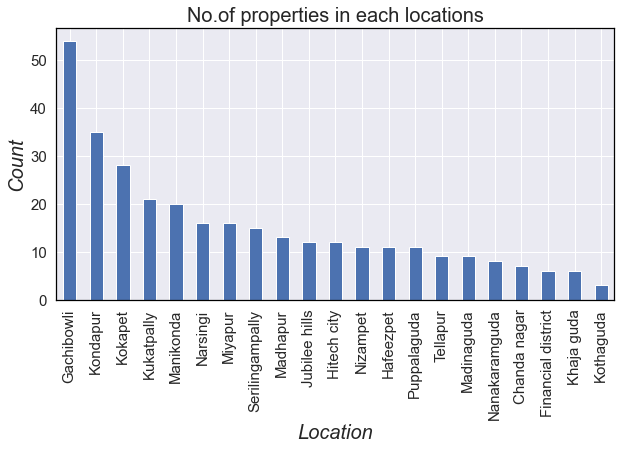

In [644]:
plt.figure(figsize=(10,5))
sns.set(rc={"axes.edgecolor":"black"})
ax1=df2["Location"].value_counts().plot(kind='bar',title="No.of Rent in each locations",fontsize=15,grid=True)
ax1.title.set_size(20)
ax1.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax1.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

### observation:
The  top 3 localities has  maximun Properties i.e "Gachibowli","Kondapur","Kokapet" and the least  no . of properties available are in "Kothaguda".
 
 

In [645]:
z=df2["Location"].value_counts()
print(z.index)
print(z.values)

Index(['Gachibowli', 'Kondapur', 'Kokapet', 'Kukatpally', 'Manikonda',
       'Narsingi', 'Miyapur', 'Serilingampally', 'Madhapur', 'Jubilee hills',
       'Hitech city', 'Nizampet', 'Hafeezpet', 'Puppalaguda', 'Tellapur',
       'Madinaguda', 'Nanakaramguda', 'Chanda nagar', 'Financial district',
       'Khaja guda', 'Kothaguda'],
      dtype='object')
[54 35 28 21 20 16 16 15 13 12 12 11 11 11  9  9  8  7  6  6  3]


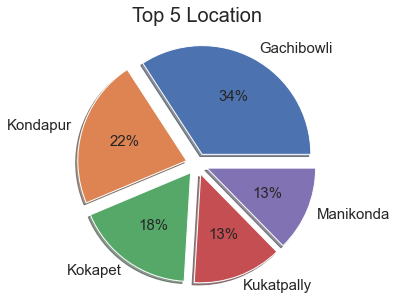

In [646]:
plt.figure(figsize=(10,5))
z=df2["Location"].value_counts()
label=['Gachibowli', 'Kondapur', 'Kokapet', 'Kukatpally', 'Manikonda']
data=[54 ,35,28, 21, 20 ]
explode=[0.1,0.1,0.1,0.1,0.1]
textprops = {"fontsize":15}
plt.pie(x=data,labels=label,autopct='%1.0f%%',frame=False,explode=explode,labeldistance=1.1,textprops=textprops,shadow = True)
plt.title("Top 5 Location",fontsize=20)


plt.show()


Observation:

-In 13 unique locations, the availablity of properties in descending order:
 
     * "Gachibowli"- 34%,
     * "Kondapur" -22% and 
     * "Kokapet"- 18%"



#### 2. BHK Information

In [647]:
d=df2['BHK'].value_counts()
d

3    187
2     89
4     31
1     11
5      4
7      1
Name: BHK, dtype: int64

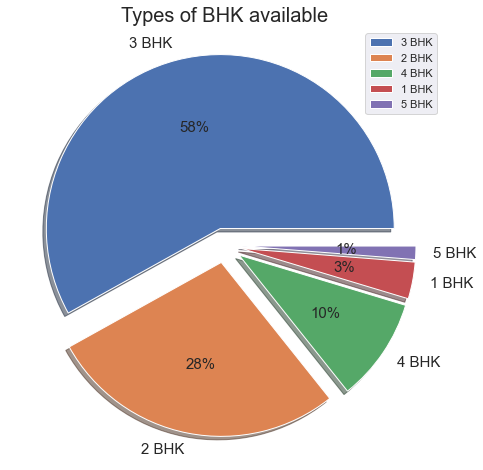

In [648]:
plt.figure(figsize=(10,8))
x=df2["BHK"].value_counts()
label=["3 BHK","2 BHK","4 BHK","1 BHK","5 BHK"]
data=[187,89,31,11,4]
explode=[0.1,0.1,0.1,0.1,0.1]
textprops = {"fontsize":15}
plt.pie(x=data,labels=label,autopct='%1.0f%%',explode=explode,labeldistance=1.1,textprops=textprops,shadow = True)
plt.title("Types of BHK available",fontsize=20)
plt.legend()

plt.show()

Observation:
- There are 58% for 3BHK ,28%for 2BHK ,10% for 4BHK,3% for 1BHK and 1% for 5BHK are available for rent .

### 3. Property_type

In [649]:
df2['Property_type'].describe()

count           323
unique            3
top       Apartment
freq            280
Name: Property_type, dtype: object

In [650]:
d=df2['Property_type'].value_counts()
d.values

array([280,  27,  16], dtype=int64)

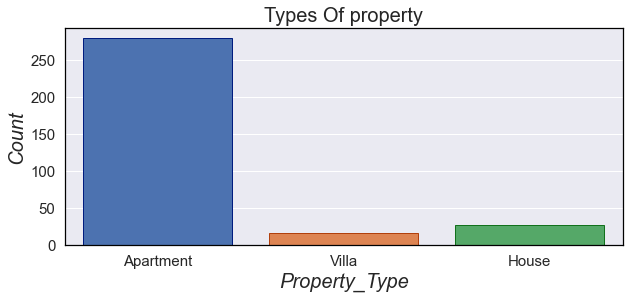

In [651]:
ax=sns.countplot(df2['Property_type'], edgecolor=sns.color_palette("dark", 3),saturation=2)
sns.set(rc={'figure.figsize':(10,4),"axes.grid":True})
ax.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax.set_xlabel("Property_Type",fontdict={'fontsize':20},fontstyle='italic')
plt.title('Types Of property',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### observation : 
"Apartment" is the highest available for rent. 


### 4.Preferred

In [653]:
df2["Tenants_Preferred"].describe()

count                  323
unique                   3
top       Bachelors/Family
freq                   163
Name: Tenants_Preferred, dtype: object

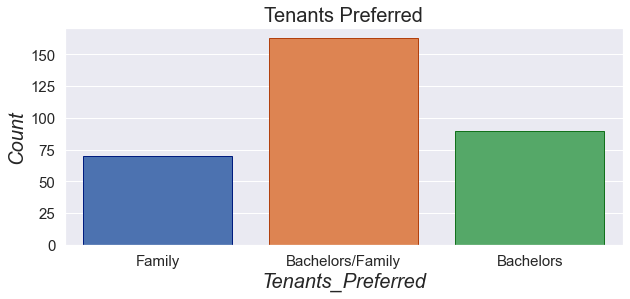

In [654]:
ax=sns.countplot(df2['Tenants_Preferred'],edgecolor=sns.color_palette("dark", 3),saturation=2)
sns.set(rc={'figure.figsize':(6,2)})
ax.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax.set_xlabel("Tenants_Preferred",fontdict={'fontsize':20},fontstyle='italic')
plt.title("Tenants Preferred",fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

### Observation:
Most of the Owners are preferring "Bachelors/Family". 


### 5.Availbility

In [656]:
df2["Availability"].describe()

count             323
unique              4
top       Immediately
freq              312
Name: Availability, dtype: object

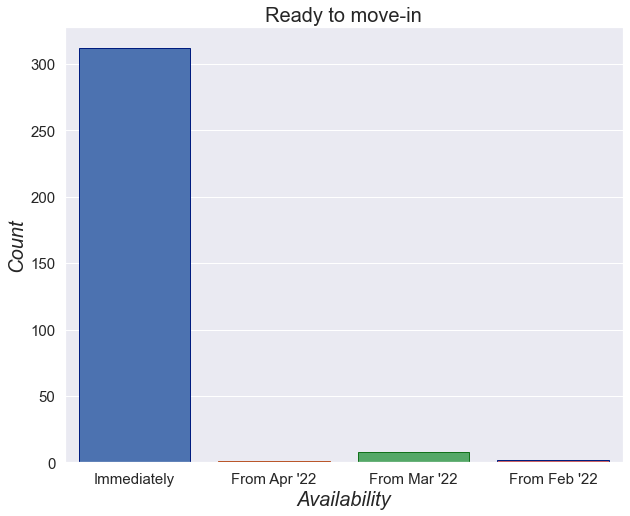

In [658]:

ax=sns.countplot(df2['Availability'],saturation=2,edgecolor=sns.color_palette("dark", 3))
sns.set(rc={'figure.figsize':(15,8)})
ax.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax.set_xlabel("Availability",fontdict={'fontsize':20},fontstyle='italic')
plt.title('Ready to move-in',fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.show()

### Observation: 
Most houses are available to move_in "Immedaitely".

### 6.Monthly_Charges

In [660]:
df2["Monthly_Charges"].describe()

count       323.000000
mean      37649.139319
std       40365.923495
min        7500.000000
25%       18500.000000
50%       28000.000000
75%       40000.000000
max      300000.000000
Name: Monthly_Charges, dtype: float64

### observation:
- The average of Monthly_Charges is Rs.37649  
- minimun of Monthly_Charges is RS.7500
- maximun of monthly_charges is RS.300000


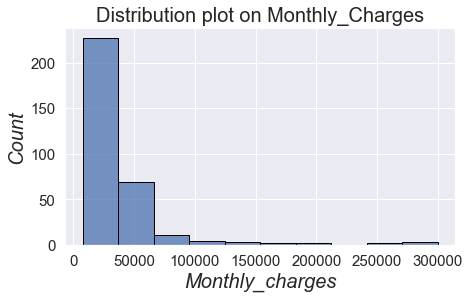

In [661]:


sns.set(rc={'figure.figsize':(7,4),"axes.grid":False})

ax=sns.histplot(df2['Monthly_Charges'],bins=10,edgecolor="black")
ax.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax.set_xlabel("Monthly_charges",fontdict={'fontsize':20},fontstyle='italic')
plt.title('Distribution plot on Monthly_Charges',fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.grid()
plt.show()

### observaton : 
- There are almost more than 200 properties  having rent range of 8000 to less than 50000


### 7.Overlooking

In [662]:
df2["Overlooking"].describe()

count             323
unique              4
top       Garden/Park
freq              117
Name: Overlooking, dtype: object

In [663]:
d=df2["Overlooking"].value_counts()
d.values

array([117,  96,  95,  15], dtype=int64)

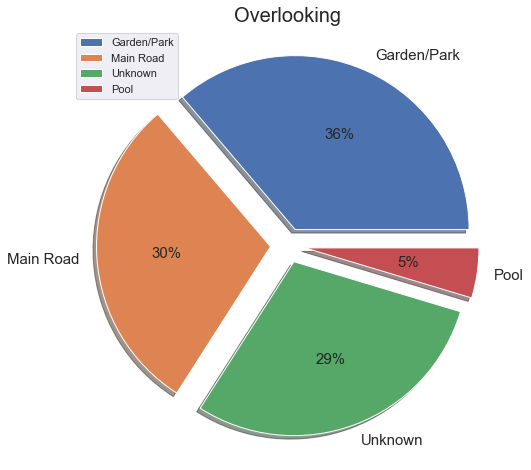

In [664]:
plt.figure(figsize=(10,8))

label=["Garden/Park","Main Road","Unknown","Pool"]
data=[117,  96,  95,  15]
explode=[0.1,0.1,0.1,0.1]
textprops = {"fontsize":15}
plt.pie(x=data,labels=label,autopct='%1.0f%%',explode=explode,labeldistance=1.1,textprops=textprops,shadow = True)
plt.title("Overlooking",fontsize=20)
plt.legend()

plt.show()

#  Bivariate  Analysis

In [1210]:
 df2

,Furnished_Type,Tenants_Preferred,Sqft,Property_type,BHK,Location,Floor,Area_type,Facing,Balcony,Overlooking,Availability,Bathroom,Monthly_Charges,car_parking
0,Unfurnished,Family,1280,Apartment,2,Hitech city,15,Carpet Area,East,1,Garden/Park,Immediately,2,39500.0,0
1,Semi-Furnished,Family,1135,Apartment,2,Kukatpally,1,Super Area,South-East,2,Unknown,Immediately,2,23000.0,1
2,Semi-Furnished,Family,1585,Apartment,2,Financial district,9,Carpet Area,West,2,Garden/Park,Immediately,2,35000.0,2
3,Semi-Furnished,Bachelors/Family,4541,Villa,4,Gachibowli,0,Carpet Area,North-East,2,Garden/Park,Immediately,4,200000.0,2
4,Unfurnished,Bachelors/Family,1345,Apartment,3,Narsingi,3,Carpet Area,North-East,1,Garden/Park,Immediately,2,25000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Semi-Furnished,Bachelors,900,Apartment,2,Narsingi,5,Carpet Area,West,1,Main Road,Immediately,2,18500.0,1
319,Semi-Furnished,Bachelors/Family,1390,Apartment,3,Hafeezpet,5,Carpet Area,East,2,Garden/Park,Immediately,2,24000.0,2
320,Semi-Furnished,Bachelors/Family,950,Apartment,2,Kukatpally,4,Carpet Area,East,1,Main Road,Immediately,2,15000.0,1
321,Furnished,Bachelors/Family,950,Apartment,2,Serilingampally,5,Carpet Area,East,2,Main Road,Immediately,2,14700.0,1


### 1. Monthly_Charges vs Location 


In [666]:
# lookin  for average rent of Location .
df2.groupby("Location")["Monthly_Charges"].mean().sort_values()


Location
Chanda nagar           15357.142857
Puppalaguda            17181.818182
Madinaguda             17888.888889
Miyapur                19906.250000
Nizampet               20590.909091
Kukatpally             22166.666667
Tellapur               23555.555556
Manikonda              24180.000000
Serilingampally        26913.333333
Hafeezpet              27363.636364
Kondapur               27705.942857
Narsingi               30312.500000
Kothaguda              36666.666667
Nanakaramguda          37187.500000
Financial district     37833.333333
Gachibowli             41334.518519
Khaja guda             43433.333333
Madhapur               45923.076923
Kokapet                59446.428571
Hitech city            66500.000000
Jubilee hills         137583.333333
Name: Monthly_Charges, dtype: float64

ax11=df2.groupby("Location")["Monthly_Charges"].mean().sort_values().plot(kind="bar",figsize=(20,5),title="Location Vs Rent ",fontsize=(16),grid=True)
sns.set(rc={'figure.figsize':(7,4),"axes.grid":False,"axes.edgecolor":"black"})
ax11.title.set_size(20)
ax11.set_ylabel("Rent",fontdict={'fontsize':20},fontstyle='italic')
ax11.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

## observation :
- On average, "Chanda Nagar" has the lowest rent (Rs. 15357) as compared to other locations, and the highest rent is in "Jubilee hills" (Rs. 137583) .
- "Chanda Nagar","Puppalaguda","Madinaguda","Miyapur","Nizampet" have average rent below 20K and hence, they   are budget-friendly location.

## Location Vs Property_type

In [669]:
df2.groupby(["Location","Property_type"])["Property_type"].count().to_frame()

Property_type
Location           Property_type               
Chanda nagar       Apartment                  6
                   House                      1
Financial district Apartment                  6
Gachibowli         Apartment                 49
                   House                      4
                   Villa                      1
Hafeezpet          Apartment                 11
Hitech city        Apartment                 11
                   Villa                      1
Jubilee hills      Apartment                  6
                   House                      4
                   Villa                      2
Khaja guda         Apartment                  5
                   Villa                      1
Kokapet            Apartment                 23
                   Villa                      5
Kondapur           Apartment                 33
                   House                      2
Kothaguda          Apartment                  3
Kukatpally         Apartment                 18
                   House                      3
Madhapur           Apartment                 11
                   House                      2
Madinaguda         Apartment                  9
Manikonda          Apartment                 18
                   House                      2
Miyapur            Apartment                 15
                   House                      1
Nanakaramguda      Apartment                  8
Narsingi           Apartment                 14
                   House                      1
                   Villa                      1
Nizampet           Apartment                  7
                   House                      3
                   Villa                      1
Puppalaguda        Apartment                  7
                   House                      3
                   Villa                      1
Serilingampally    Apartment                 14
                   Villa                      1
Tellapur           Apartment                  6
                   House                      1
                   Villa                      2

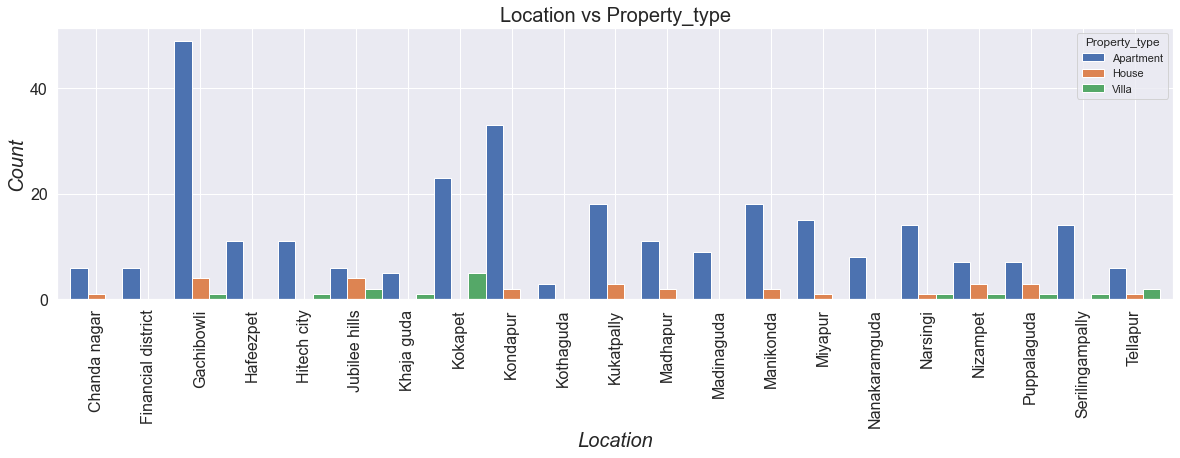

In [853]:

ax12=df2.groupby(["Location","Property_type"])["Property"].count().unstack().plot(kind="bar", stacked=False,figsize=(20,5),title="Location vs Property_type",width=1,fontsize=(16),grid=True)
ax12.title.set_size(20)
ax12.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax12.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')

plt.show()


observation : 
- Most of the locations have "Apartment" type properties . 
- Gachibowli has the maximum number of Apartments

## Location vs Bhk

In [1052]:
df2.groupby(["Location","BHK"])["BHK"].count().to_frame()



BHK
Location           BHK     
Chanda nagar       2      5
                   3      2
Financial district 2      2
                   3      4
Gachibowli         1      2
...                     ...
Serilingampally    3      5
                   4      2
Tellapur           2      2
                   3      6
                   4      1

[64 rows x 1 columns]

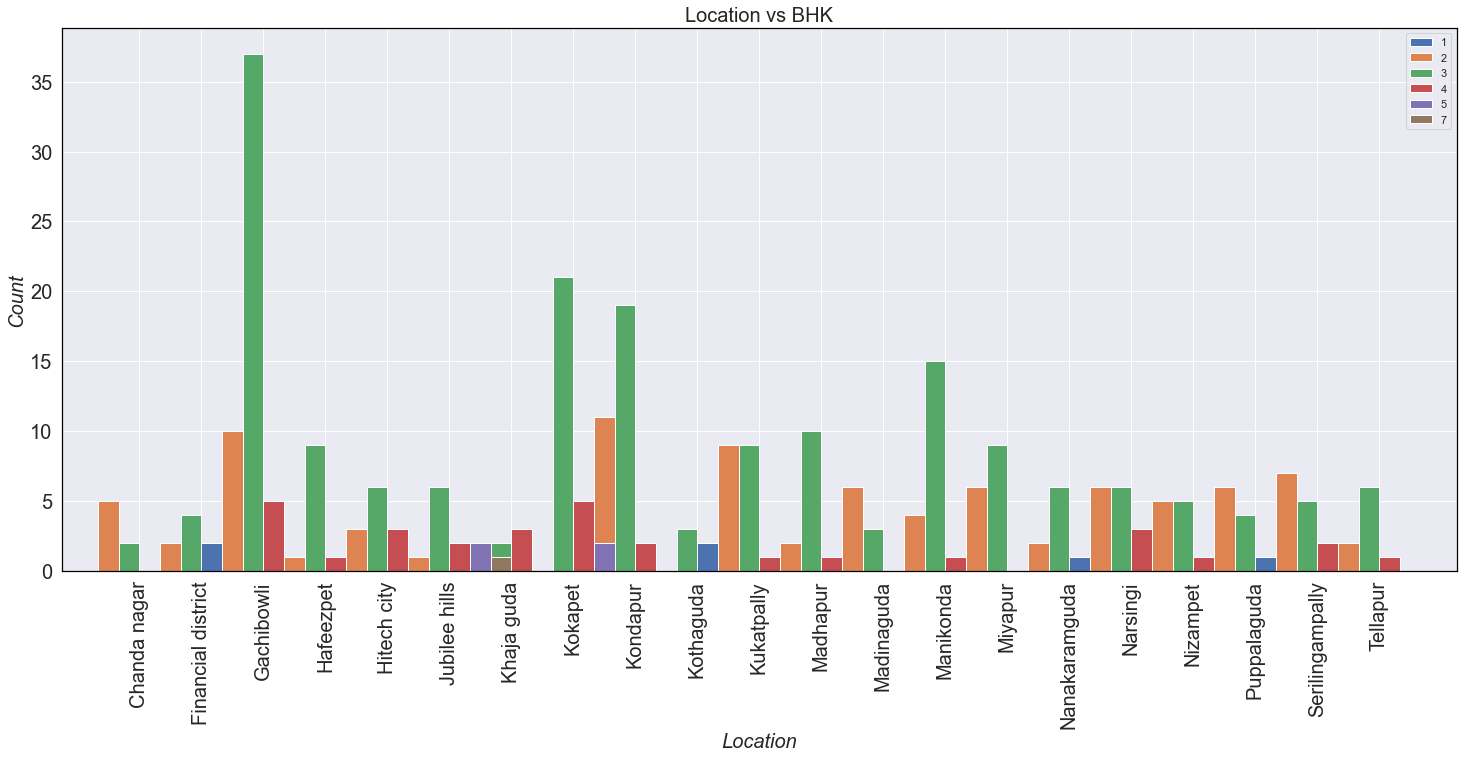

In [1047]:
ax13=df2.groupby(["Location","BHK"])["BHK"].count().unstack().plot(kind="bar", stacked=False,width=2, figsize=(25,10),title="Location vs BHK",xlabel="Location",ylabel="Count",fontsize=(20),grid=True)
ax13.title.set_size(20)
ax13.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax13.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.legend()
plt.show()

##### Observation :
Most of the locations have 2BHK and 3BHK for rent.
- "Gachibowli", "Kondapur", "Kokapet" have many 3BHK for rent.(below 50,below 40 and  above20 respectively.)
- "Kondapur","kukatpally" and "Gachibowli" have many 2BHK for rent.

## Location vs Balcony

In [678]:
df2.groupby(["Location","Balcony"])["Balcony"].count().to_frame()

Balcony
Location           Balcony         
Chanda nagar       1              4
                   2              3
Financial district 1              2
                   2              3
                   3              1
...                             ...
Serilingampally    2              7
                   4              1
Tellapur           0              2
                   1              4
                   2              3

[74 rows x 1 columns]

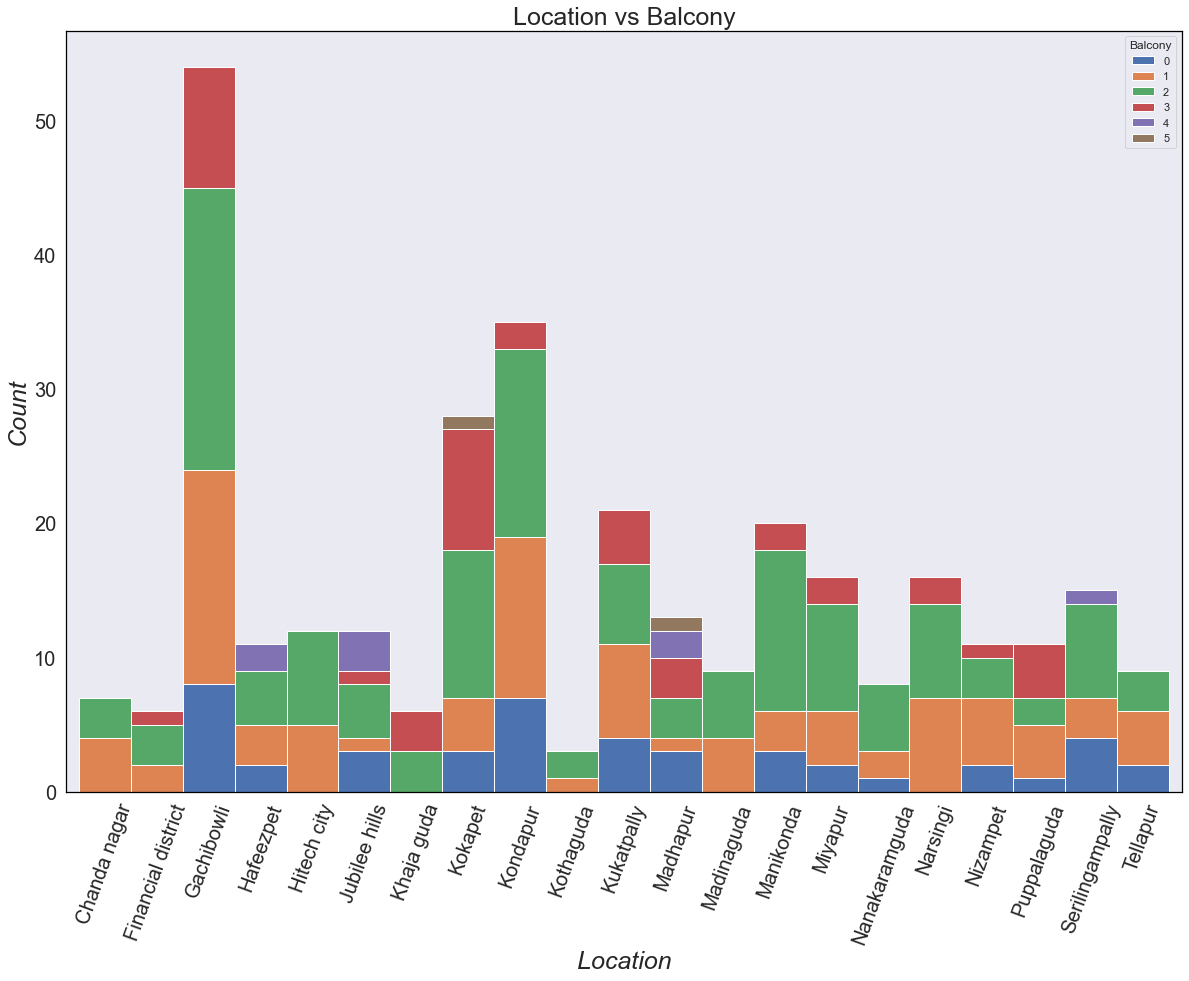

In [679]:
ax14=df2.groupby(["Location","Balcony"])["Balcony"].count().unstack().plot(kind="bar", stacked=True,width=1, figsize=(20,14),title="Location vs Balcony",fontsize=(20),rot=70)
ax14.title.set_size(25)
ax14.set_ylabel("Count",fontdict={'fontsize':25},fontstyle='italic')
ax14.set_xlabel("Location",fontdict={'fontsize':25},fontstyle='italic')
plt.show()

observation :

- Very less number of properties have 4 or 5 balconies

- Compared to other locations "Gachibowli" has the maximum number of rental properties with 2 or 3 balconies

## Location vs Bathroom

In [680]:
df2.groupby(["Location","Bathroom"])["Bathroom"].count().to_frame()

Bathroom
Location           Bathroom          
Chanda nagar       2                6
                   3                1
Financial district 2                3
                   3                3
Gachibowli         1                2
...                               ...
Serilingampally    3                1
                   4                3
Tellapur           1                2
                   3                4
                   4                3

[72 rows x 1 columns]

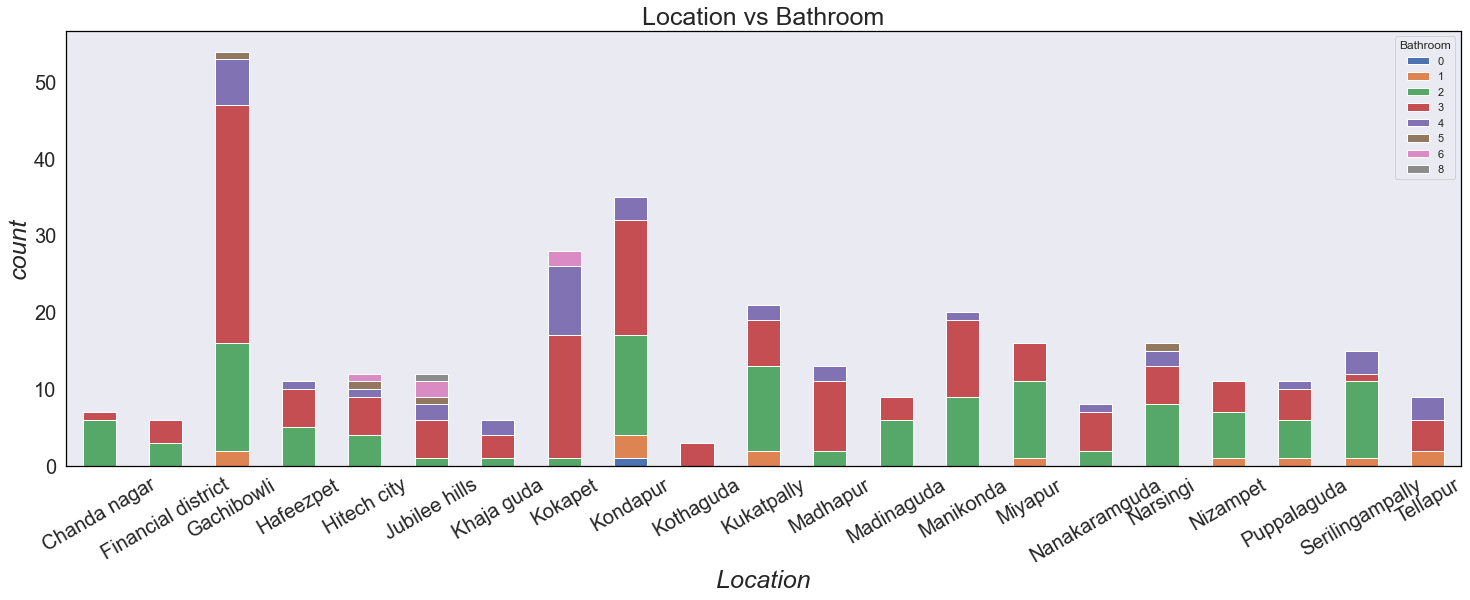

In [681]:
ax15=df2.groupby(["Location","Bathroom"])["Bathroom"].count().unstack().plot(kind="bar", stacked=True, figsize=(25,8),title="Location vs Bathroom",xlabel="Location",ylabel="Count",fontsize=(20),rot=30)
ax15.title.set_size(25)
ax15.set_ylabel("count",fontdict={'fontsize':25},fontstyle='italic')
ax15.set_xlabel("Location",fontdict={'fontsize':25},fontstyle='italic')
plt.show()


observation :
Most of the properties have 2 and 3 Bathrooms in each location.

## Location Vs Tenants_Preferred

In [690]:
df2.groupby(["Location","Tenants_Preferred"])["Tenants_Preferred"].count().to_frame()

Tenants_Preferred
Location           Tenants_Preferred                   
Chanda nagar       Bachelors                          1
                   Bachelors/Family                   5
                   Family                             1
Financial district Bachelors/Family                   4
                   Family                             2
Gachibowli         Bachelors                         16
                   Bachelors/Family                  30
                   Family                             8
Hafeezpet          Bachelors                          2
                   Bachelors/Family                   7
                   Family                             2
Hitech city        Bachelors                          5
                   Bachelors/Family                   3
                   Family                             4
Jubilee hills      Bachelors                          3
                   Bachelors/Family                   8
                   Family                             1
Khaja guda         Bachelors                          1
                   Bachelors/Family                   2
                   Family                             3
Kokapet            Bachelors                          5
                   Bachelors/Family                  16
                   Family                             7
Kondapur           Bachelors                         15
                   Bachelors/Family                  17
                   Family                             3
Kothaguda          Bachelors/Family                   3
Kukatpally         Bachelors                          3
                   Bachelors/Family                   9
                   Family                             9
Madhapur           Bachelors                          7
                   Bachelors/Family                   4
                   Family                             2
Madinaguda         Bachelors                          2
                   Bachelors/Family                   3
                   Family                             4
Manikonda          Bachelors                          7
                   Bachelors/Family                   8
                   Family                             5
Miyapur            Bachelors                          2
                   Bachelors/Family                  11
                   Family                             3
Nanakaramguda      Bachelors                          1
                   Bachelors/Family                   4
                   Family                             3
Narsingi           Bachelors                          8
                   Bachelors/Family                   5
                   Family                             3
Nizampet           Bachelors                          2
                   Bachelors/Family                   6
                   Family                             3
Puppalaguda        Bachelors                          5
                   Bachelors/Family                   5
                   Family                             1
Serilingampally    Bachelors                          2
                   Bachelors/Family                   8
                   Family                             5
Tellapur           Bachelors                          3
                   Bachelors/Family                   5
                   Family                             1

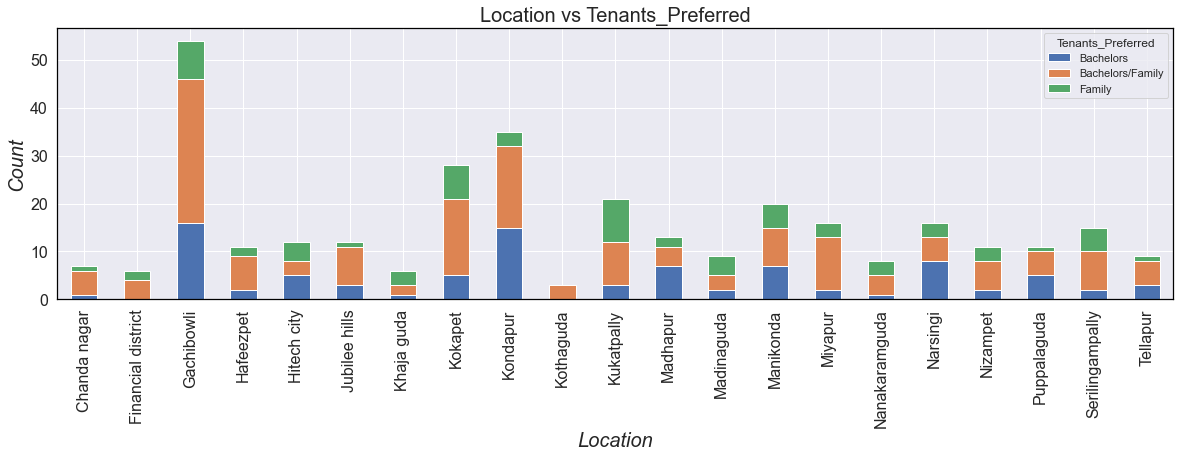

In [859]:
ax15=df2.groupby(["Location","Tenants_Preferred"])["Tenants_Preferred"].count().unstack().plot(kind="bar", grid=True,stacked=True, figsize=(20,5),title="Location vs Tenants_Preferred",fontsize=(16))
ax15.title.set_size(20)
ax15.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax15.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

### observation :
- The most preferred category by the owners for renting is Bachelors/Family.

- "Bachelors/family" and "Bachelors"are mostly preferred in "Gachibowli" and "Kondapur",
- "Family" are mostly preferred in "Gachibowli","Kukatpally" and "Kondapur"

## Location vs Furnished_Type

In [692]:
df2.groupby(["Location","Furnished_Type"])["Furnished_Type"].count().to_frame()

Furnished_Type
Location           Furnished_Type                
Chanda nagar       Semi-Furnished               4
                   Unfurnished                  2
                   Unknown                      1
Financial district Semi-Furnished               4
                   Unfurnished                  2
Gachibowli         Furnished                   10
                   Semi-Furnished              35
                   Unfurnished                  9
Hafeezpet          Furnished                    2
                   Semi-Furnished               7
                   Unfurnished                  2
Hitech city        Semi-Furnished              10
                   Unfurnished                  2
Jubilee hills      Furnished                    1
                   Semi-Furnished               9
                   Unfurnished                  2
Khaja guda         Furnished                    1
                   Semi-Furnished               5
Kokapet            Furnished                    8
                   Semi-Furnished              18
                   Unfurnished                  2
Kondapur           Furnished                    6
                   Semi-Furnished              20
                   Unfurnished                  8
                   Unknown                      1
Kothaguda          Furnished                    3
Kukatpally         Furnished                    2
                   Semi-Furnished              17
                   Unfurnished                  2
Madhapur           Furnished                    3
                   Semi-Furnished               6
                   Unfurnished                  4
Madinaguda         Furnished                    1
                   Semi-Furnished               4
                   Unfurnished                  4
Manikonda          Furnished                    1
                   Semi-Furnished               9
                   Unfurnished                 10
Miyapur            Semi-Furnished              11
                   Unfurnished                  5
Nanakaramguda      Furnished                    1
                   Semi-Furnished               6
                   Unfurnished                  1
Narsingi           Furnished                    2
                   Semi-Furnished              10
                   Unfurnished                  4
Nizampet           Semi-Furnished               8
                   Unfurnished                  3
Puppalaguda        Furnished                    2
                   Semi-Furnished               5
                   Unfurnished                  4
Serilingampally    Furnished                    3
                   Semi-Furnished               8
                   Unfurnished                  4
Tellapur           Furnished                    1
                   Semi-Furnished               2
                   Unfurnished                  6

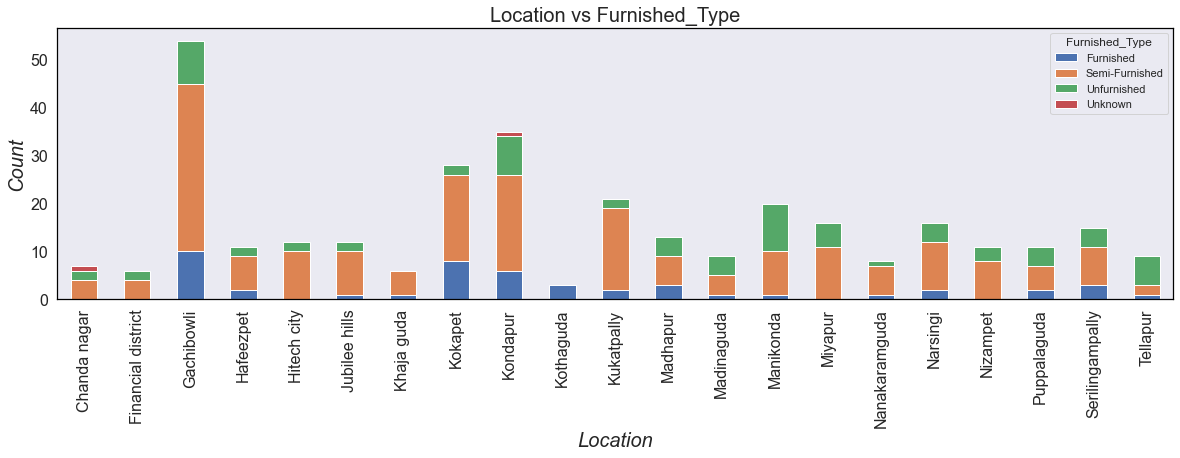

In [693]:
ax16=df2.groupby(["Location","Furnished_Type"])["Furnished_Type"].count().unstack().plot(kind="bar", stacked=True, figsize=(20,5),title="Location vs Furnished_Type",fontsize=(16))
ax16.title.set_size(20)
ax16.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax16.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

observation:
Most of the properties are "Semi-Furnished".


In [1128]:
df2.groupby(["Location","Facing"])["Facing"].count().to_frame()

Facing
Location           Facing         
Chanda nagar       East          4
                   Unknown       2
                   West          1
Financial district East          3
                   West          3
...                            ...
Serilingampally    South         1
Tellapur           East          4
                   North         1
                   Unknown       1
                   West          3

[90 rows x 1 columns]

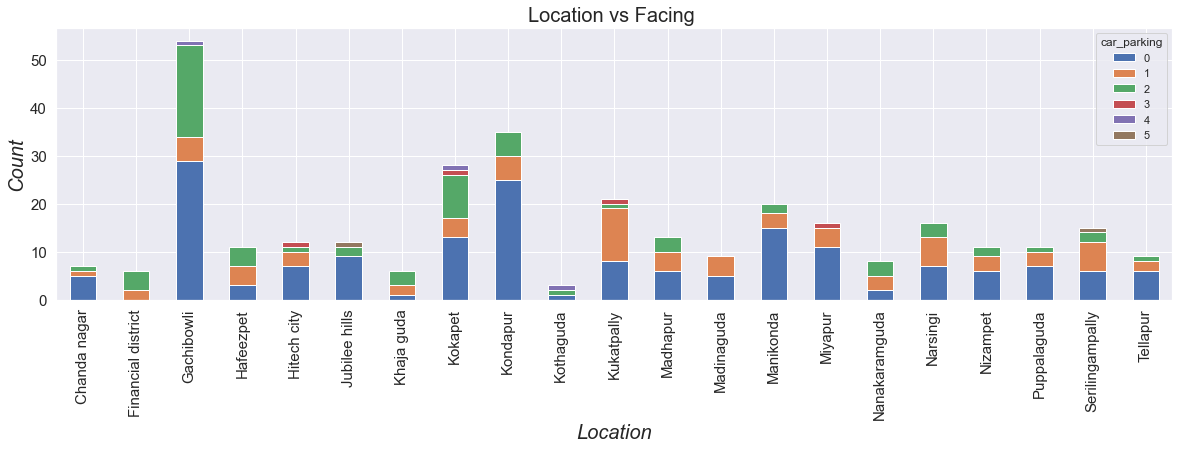

In [1132]:
ax18=df2.groupby(["Location","car_parking"])["car_parking"].count().unstack().plot(kind="bar", stacked=True, figsize=(20,5),title="Location vs Facing ",xlabel="Location",ylabel="Count",fontsize=(15),grid=True)
ax18.title.set_size(20)
ax18.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax18.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

In [694]:
df2.groupby(["Location","Availability"])["Availability"].count().to_frame()

Availability
Location           Availability              
Chanda nagar       Immediately              7
Financial district Immediately              6
Gachibowli         From Feb '22             2
                   Immediately             52
Hafeezpet          Immediately             11
Hitech city        Immediately             12
Jubilee hills      Immediately             12
Khaja guda         Immediately              6
Kokapet            From Mar '22             1
                   Immediately             27
Kondapur           From Mar '22             1
                   Immediately             34
Kothaguda          Immediately              3
Kukatpally         From Mar '22             3
                   Immediately             18
Madhapur           Immediately             13
Madinaguda         From Mar '22             1
                   Immediately              8
Manikonda          From Mar '22             1
                   Immediately             19
Miyapur            Immediately             16
Nanakaramguda      Immediately              8
Narsingi           From Mar '22             1
                   Immediately             15
Nizampet           From Apr '22             1
                   Immediately             10
Puppalaguda        Immediately             11
Serilingampally    Immediately             15
Tellapur           Immediately              9

### Location vs Availability 

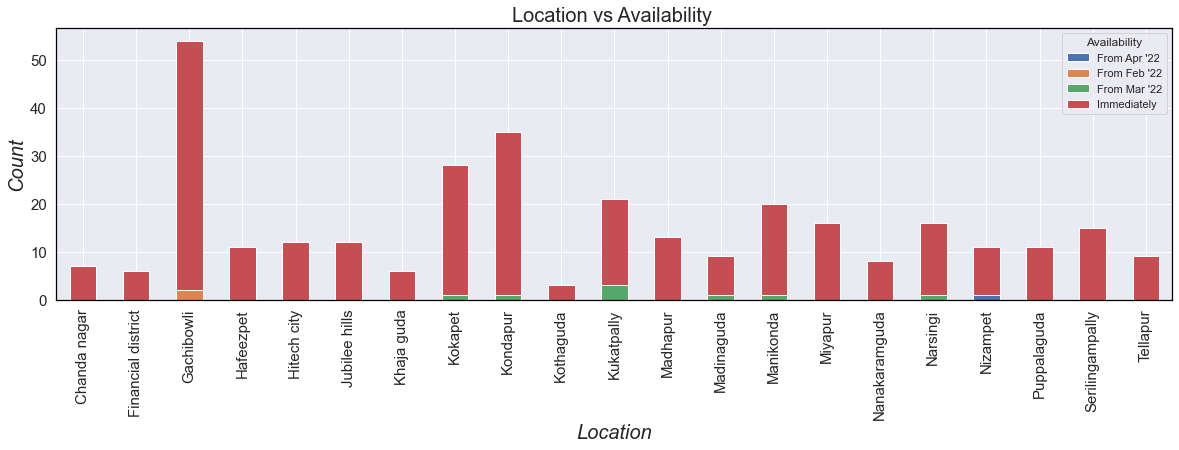

In [695]:
ax17=df2.groupby(["Location","Availability"])["Availability"].count().unstack().plot(kind="bar", stacked=True, figsize=(20,5),title="Location vs Availability ",xlabel="Location",ylabel="Count",fontsize=(15),grid=True)
ax17.title.set_size(20)
ax17.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax17.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

## 1. Bachelors

In [1202]:
Bachelors_rent=df2[df2["Monthly_Charges"]<=20000 ]

In [1200]:
Bachelors_rent=Bachelors_rent[(Bachelors_rent["Tenants_Preferred"]=="Bachelors") | (Bachelors_rent["Tenants_Preferred"]=="Bachelors/Family")]

In [1139]:
Bachelors_rent["Location"].value_counts().sort_values(ascending=False)

Kondapur              11
Kukatpally            11
Nizampet               8
Miyapur                8
Puppalaguda            8
Chanda nagar           6
Gachibowli             6
Narsingi               5
Serilingampally        5
Manikonda              5
Madinaguda             4
Tellapur               4
Jubilee hills          1
Hafeezpet              1
Financial district     1
Hitech city            1
Name: Location, dtype: int64

### No.of rent available in each location

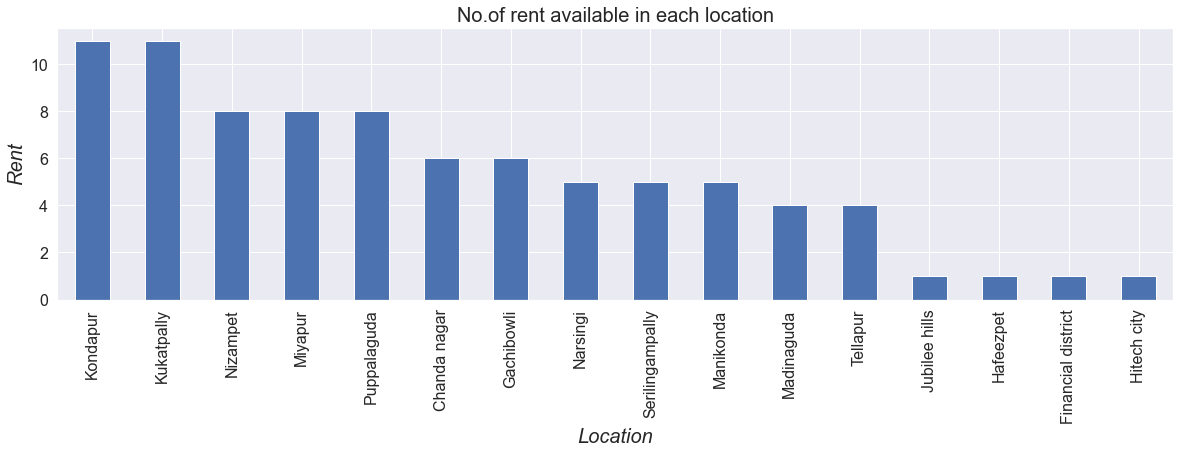

In [1140]:
ax20=Bachelors_rent["Location"].value_counts().plot(kind="bar",grid=True,figsize=(20,5),title="No.of rent available in each location",fontsize=(16))
sns.set(rc={'figure.figsize':(7,4),"axes.grid":False,"axes.edgecolor":"black"})
ax20.title.set_size(20)
ax20.set_ylabel("Rent",fontdict={'fontsize':20},fontstyle='italic')
ax20.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

##### Observation : 
observation : "Kukatpally"and "Kondapur" are having more no.of properties available for rent  .

###  Location vs Rent

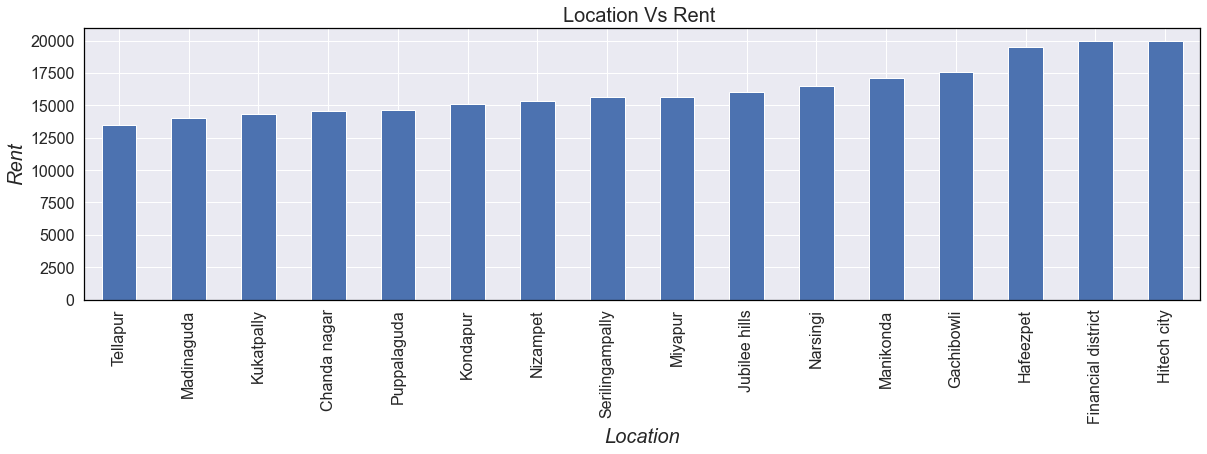

In [1143]:
ax11=Bachelors_rent.groupby("Location")["Monthly_Charges"].mean().sort_values().plot(kind="bar",figsize=(20,5),title="Location Vs Rent ",fontsize=(16),grid=True)
sns.set(rc={'figure.figsize':(7,4),"axes.grid":False,"axes.edgecolor":"black"})
ax11.title.set_size(20)
ax11.set_ylabel("Rent",fontdict={'fontsize':20},fontstyle='italic')
ax11.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

##### Observation : 
 "Tellapur","Madinaguda","Kukatpally","Chanda Nagar","kondapur","Nizampet" are the average lowest location.

In [ ]:
ax12=Bachelore_rent.groupby(["Location","Property_type"])["Property_type"].count().unstack().plot(kind="bar", stacked=False,figsize=(20,5),title="Location vs Property_type",width=1,fontsize=(16),grid=True)
ax12.title.set_size(20)
ax12.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax12.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')

##### Observation:
Most of the locations have "Apartment" type properties 

### Location vs Bhk

In [1147]:
Bachelors_rent.groupby(["Location","BHK"])["BHK"].count().to_frame()

BHK
Location           BHK     
Chanda nagar       2      5
                   3      1
Financial district 3      1
Gachibowli         1      2
                   2      4
Hafeezpet          3      1
Hitech city        3      1
Jubilee hills      2      1
Kondapur           1      3
                   2      8
Kukatpally         1      2
                   2      6
                   3      3
Madinaguda         2      4
Manikonda          2      2
                   3      3
Miyapur            1      1
                   2      5
                   3      2
Narsingi           1      1
                   2      3
                   3      1
Nizampet           2      5
                   3      3
Puppalaguda        1      1
                   2      5
                   3      2
Serilingampally    1      1
                   2      3
                   3      1
Tellapur           2      2
                   3      2

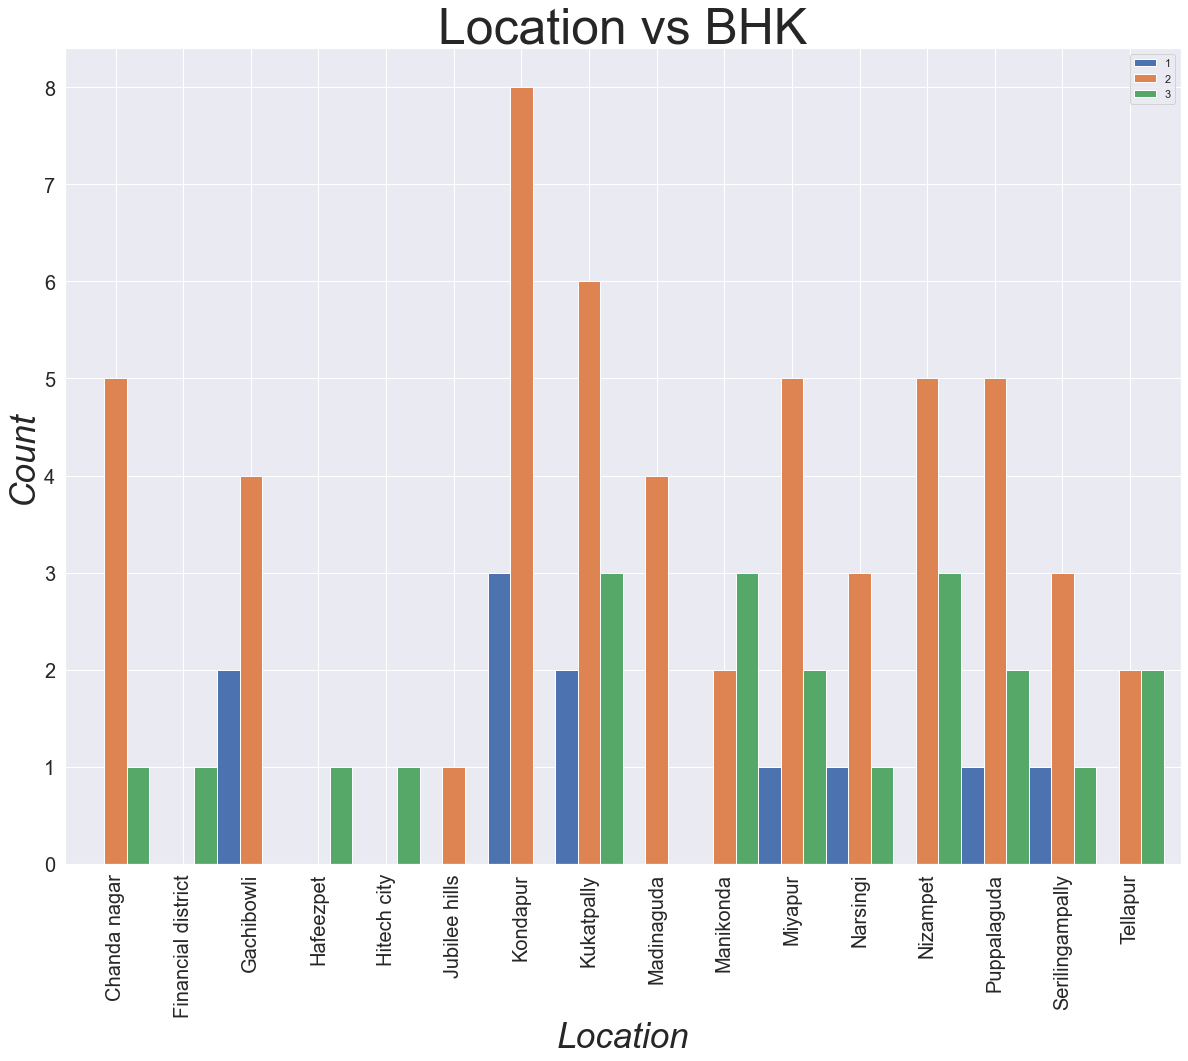

In [1148]:
sns.set(rc={'ytick.labelsize':35,'xtick.labelsize':35})
ax=Bachelors_rent.groupby(["Location","BHK"])["BHK"].count().unstack().plot(kind="bar", stacked=False,width=1, figsize=(20,15),title="Location vs BHK",xlabel="Location",ylabel="Count",fontsize=(20),grid=True)
ax.title.set_size(50)
ax.set_ylabel("Count",fontdict={'fontsize':35},fontstyle='italic')
ax.set_xlabel("Location",fontdict={'fontsize':35},fontstyle='italic')
plt.legend()
plt.show()

##### Observation :
Most of the locations have 2BHK and 3BHK for rent.
"kondapur" and "kukatpally" has more no.of 2bhk for rent.

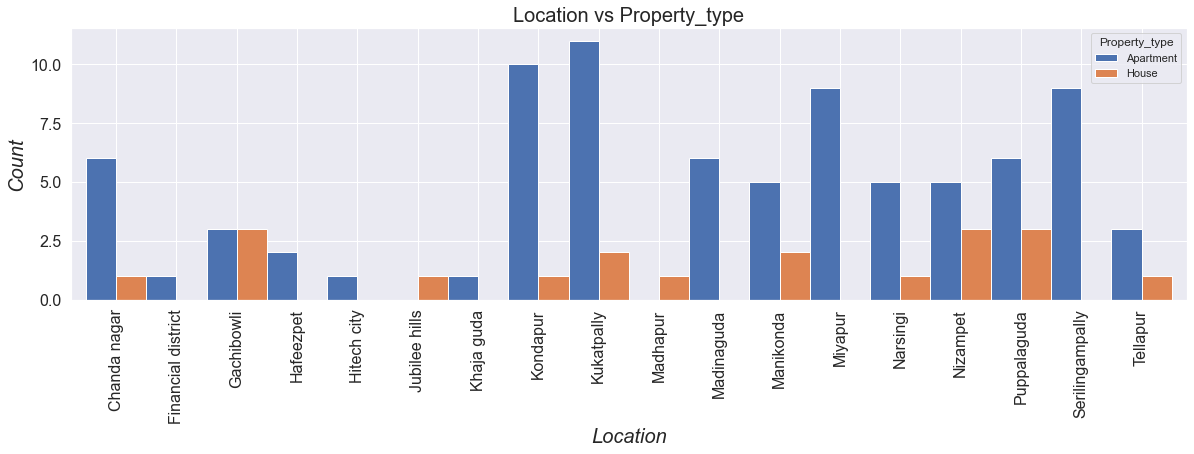

In [1226]:
ax16=Bachelors_rent.groupby(["Location","Property_type"])["Property_type"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,5),title="Location vs Property_type",fontsize=(16))
ax16.title.set_size(20)
ax16.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax16.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

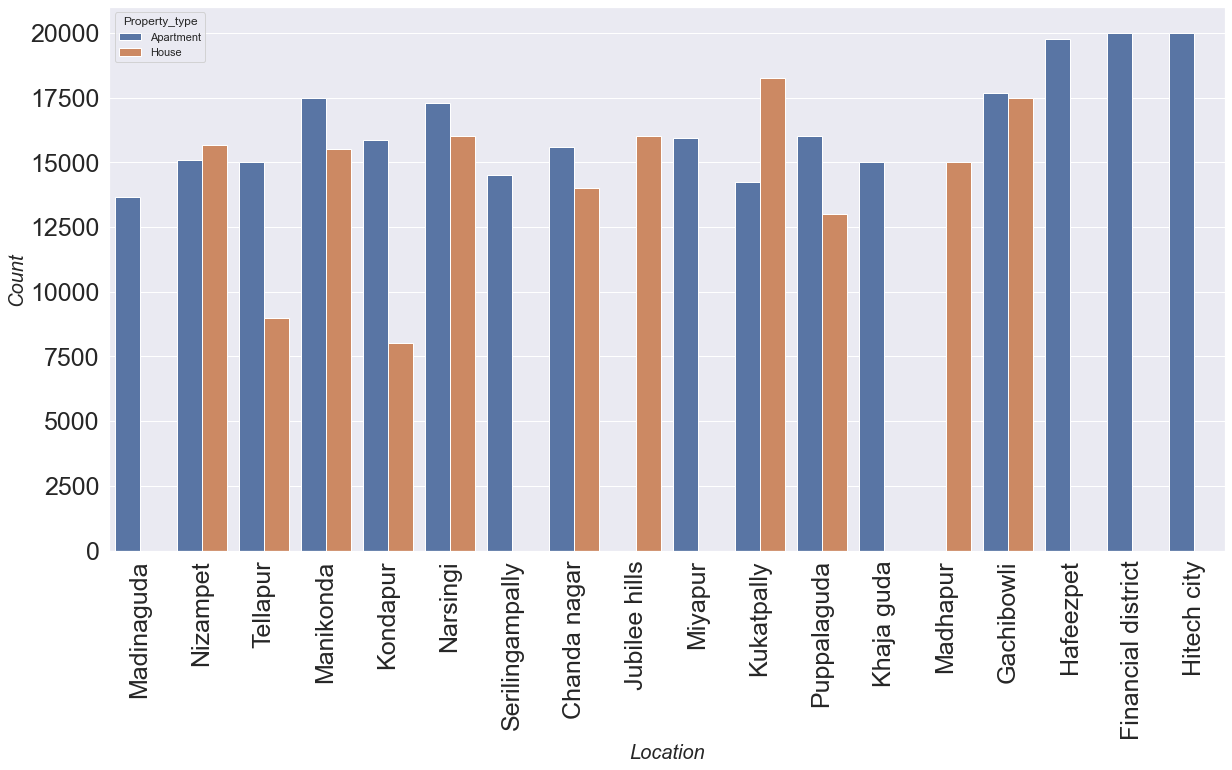

In [1228]:
plt.figure(figsize=(20, 10))
ax35=sns.barplot(data=range_rent,
                x = Bachelors_rent['Location'],
                y = Bachelors_rent['Monthly_Charges'],hue=Bachelors_rent['Property_type'],ci=None
   )
ax35.title.set_size(20)
ax35.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax35.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.xticks(rotation=90)
plt.show()

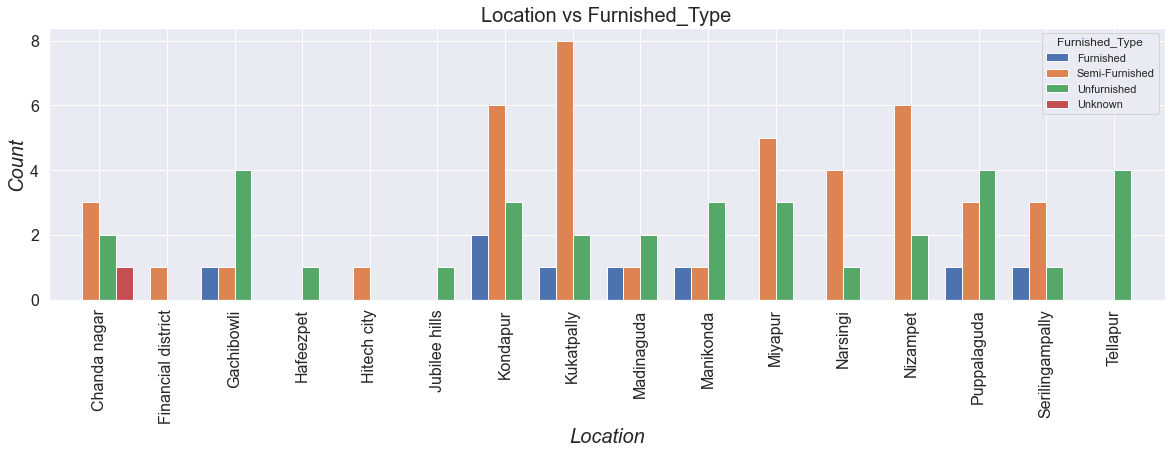

In [1191]:
ax16=Bachelors_rent.groupby(["Location","Furnished_Type"])["Furnished_Type"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,5),title="Location vs Furnished_Type",fontsize=(16))
ax16.title.set_size(20)
ax16.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax16.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

### Observation:
Most of the properties are "Semi-Furnished" and un-furnished and less for  furnished.

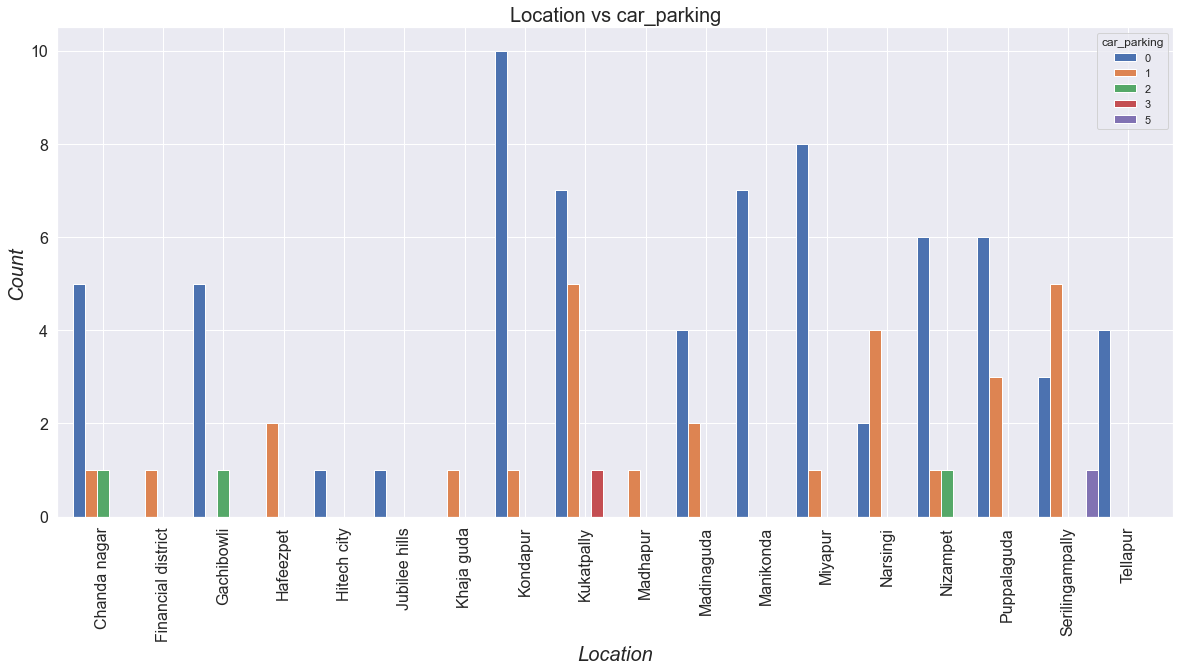

In [1203]:
ax36=Bachelors_rent.groupby(["Location","car_parking"])["car_parking"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,9),title="Location vs car_parking",fontsize=(16))
ax36.title.set_size(20)
ax36.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax36.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

# Family looking for Apartment 

In [1211]:
Family_rent=df2[(df2["Tenants_Preferred"]=="Family") | (df2["Tenants_Preferred"]=="Bachelors/Family")]

In [1212]:
Family_rent=Family_rent[Family_rent["Property_type"]=="Apartment"]

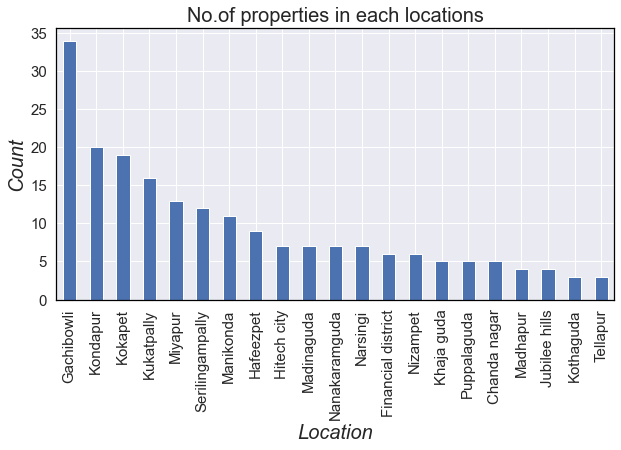

In [1213]:
plt.figure(figsize=(10,5))
sns.set(rc={"axes.edgecolor":"black"})
ax50=Family_rent["Location"].value_counts().plot(kind='bar',title="No.of properties in each locations",fontsize=15,grid=True)
ax50.title.set_size(20)
ax50.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax50.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

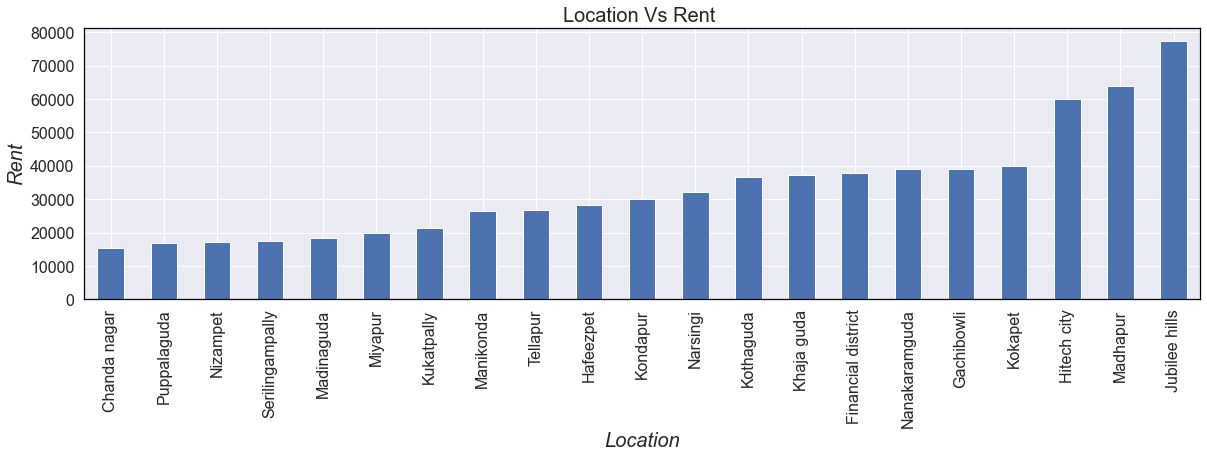

In [1214]:
ax51=Family_rent.groupby("Location")["Monthly_Charges"].mean().sort_values().plot(kind="bar",figsize=(20,5),title="Location Vs Rent ",fontsize=(16),grid=True)
sns.set(rc={'figure.figsize':(7,4),"axes.grid":False,"axes.edgecolor":"black"})
ax51.title.set_size(20)
ax51.set_ylabel("Rent",fontdict={'fontsize':20},fontstyle='italic')
ax51.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

### observation : 
"Chanda Nagar","Puppalaguda","Nizampet","Serilingampally","Madinaguda","Miyapur" are the average lowest locations available for rent.


### Location vs BHK


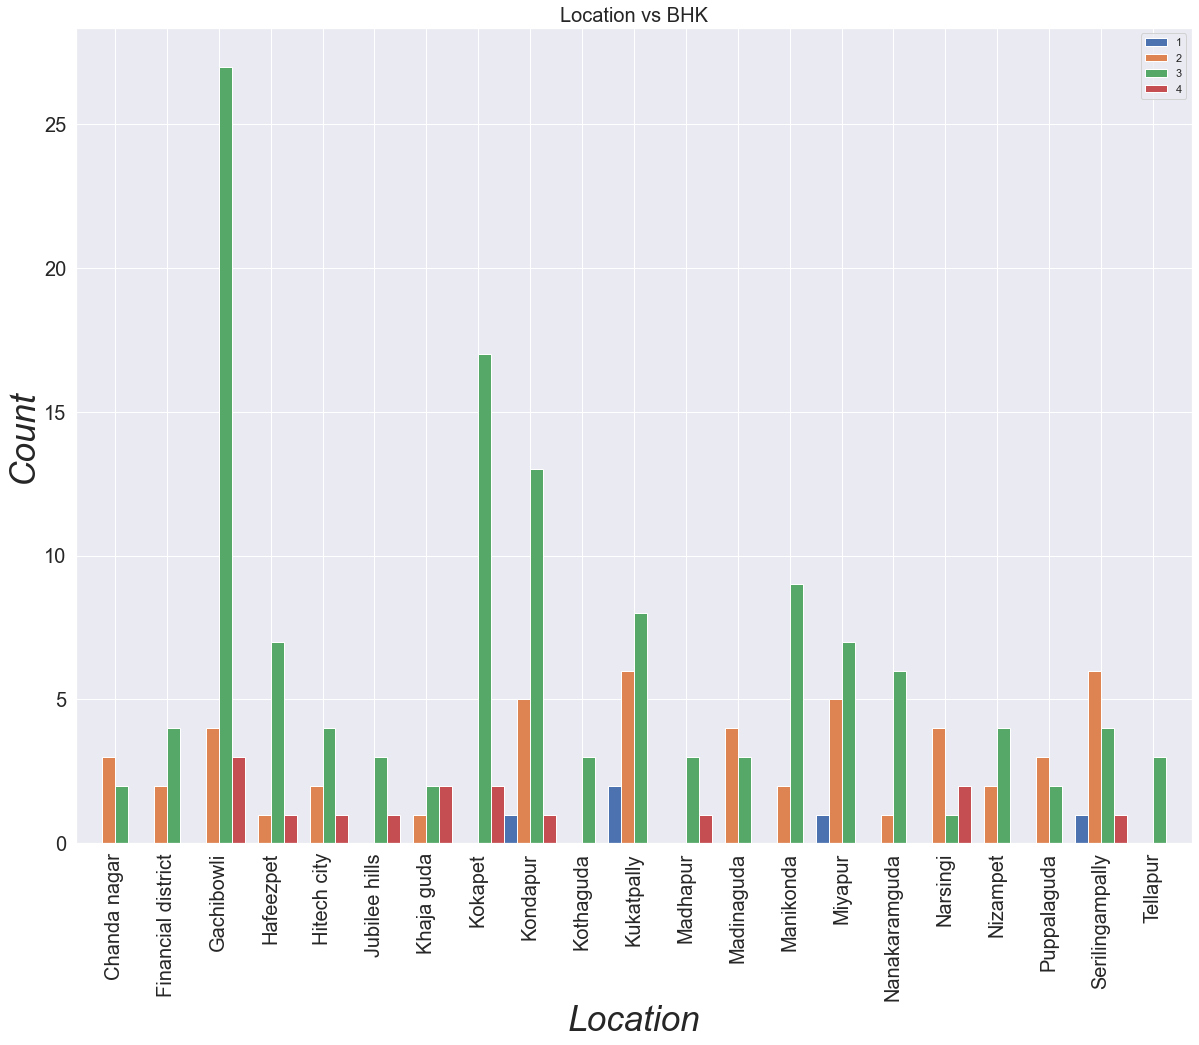

In [1216]:
sns.set(rc={'ytick.labelsize':25,'xtick.labelsize':25})
ax21=Family_rent.groupby(["Location","BHK"])["BHK"].count().unstack().plot(kind="bar", stacked=False,width=1, figsize=(20,15),title="Location vs BHK",xlabel="Location",ylabel="Count",fontsize=(20),grid=True)
ax21.title.set_size(20)
ax21.set_ylabel("Count",fontdict={'fontsize':35},fontstyle='italic')
ax21.set_xlabel("Location",fontdict={'fontsize':35},fontstyle='italic')
plt.legend()
plt.show()

### observation :
Alomost all the locations are having 3bhk and 2Bhk .
- Top 3 location are  having  no.of 3bhk is "Gachibowli","kokapet","kondapur"

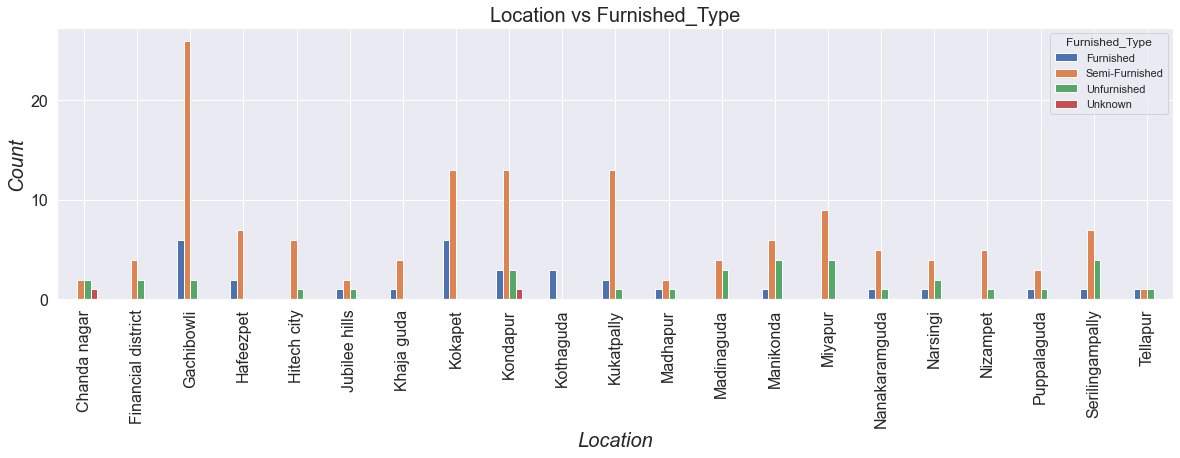

In [1218]:
ax22=Family_rent.groupby(["Location","Furnished_Type"])["Furnished_Type"].count().unstack().plot(kind="bar", stacked=False, figsize=(20,5),title="Location vs Furnished_Type",fontsize=(16))
ax22.title.set_size(20)
ax22.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax22.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

### observation : 
most of the location  are having atleast "semifurnished" and unfurnished

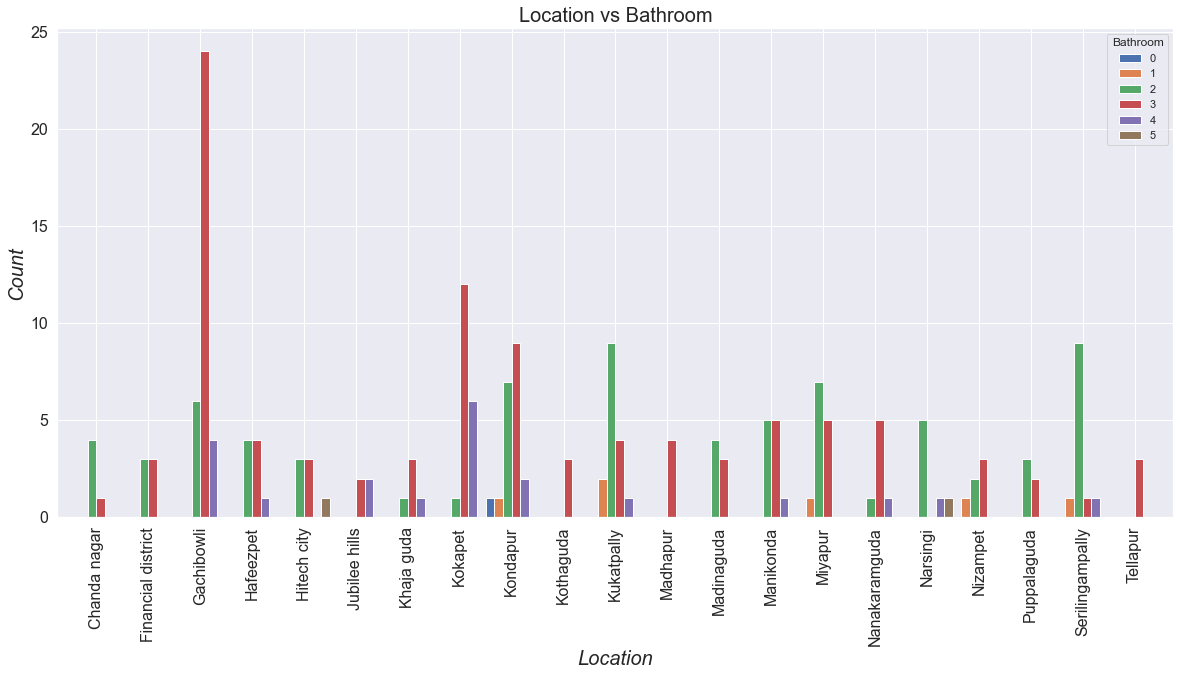

In [1225]:
ax34=Family_rent.groupby(["Location","Bathroom"])["Bathroom"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,9),title="Location vs Bathroom",fontsize=(16))
ax34.title.set_size(20)
ax34.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax34.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

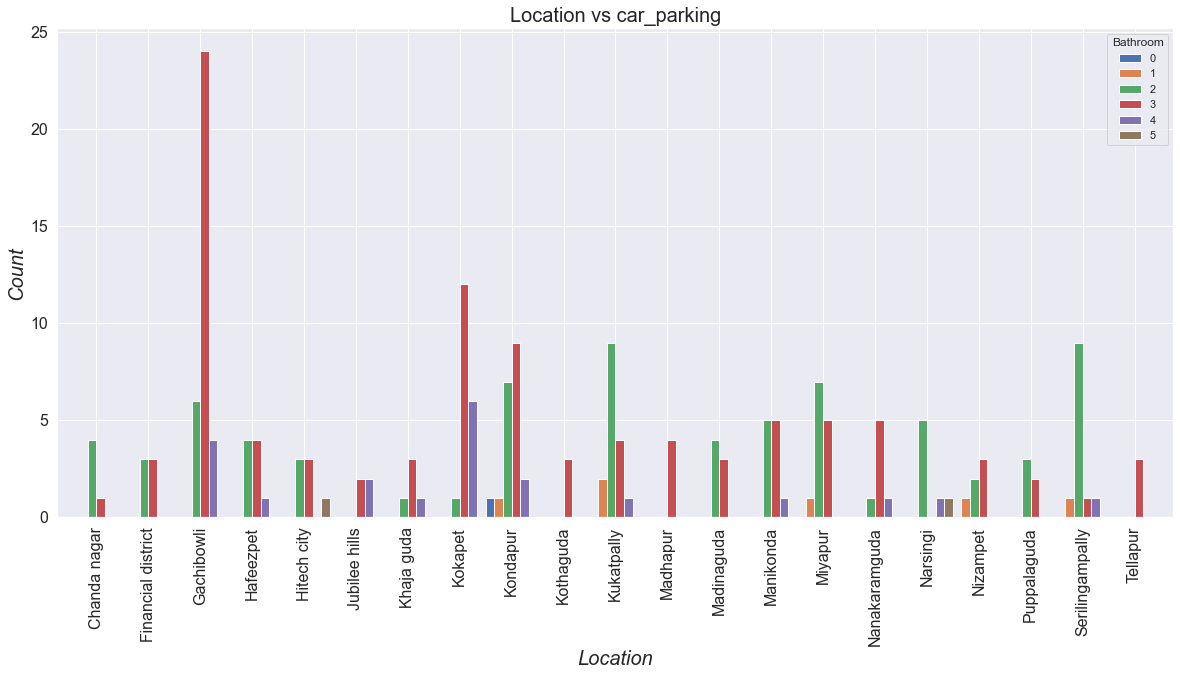

In [1221]:
ax38=Family_rent.groupby(["Location","Bathroom"])["Bathroom"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,9),title="Location vs car_parking",fontsize=(16))
ax38.title.set_size(20)
ax38.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax38.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

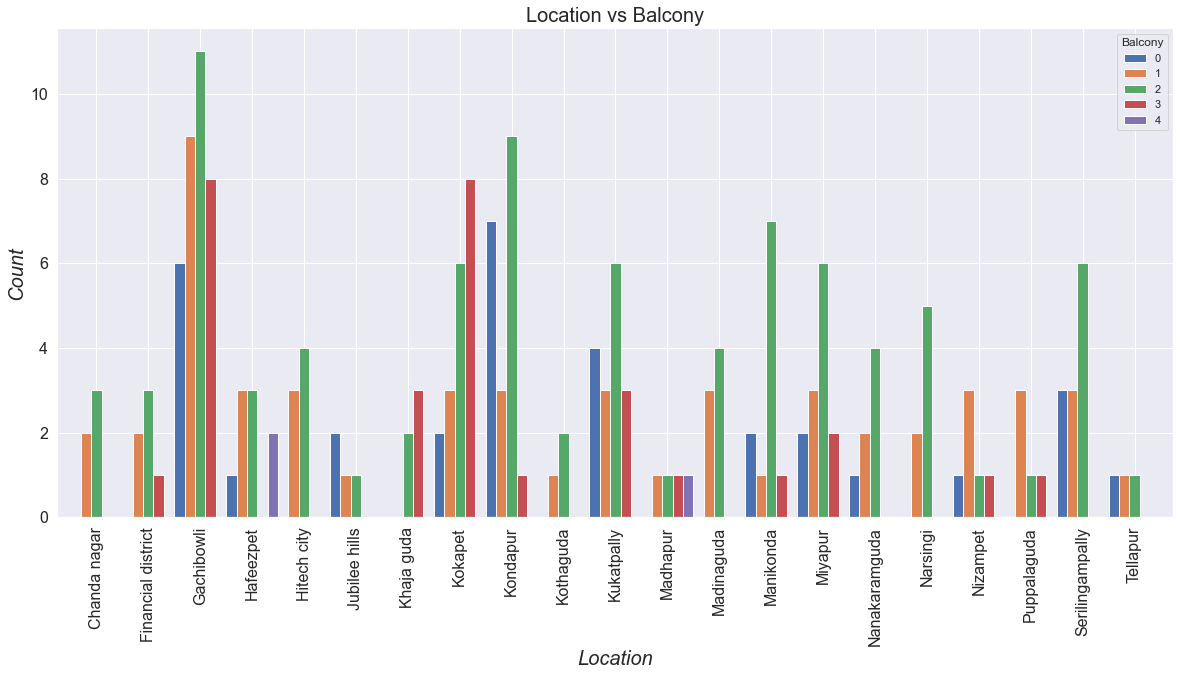

In [1222]:
ax37=Family_rent.groupby(["Location","Balcony"])["Balcony"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,9),title="Location vs Balcony",fontsize=(16))
ax37.title.set_size(20)
ax37.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax37.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

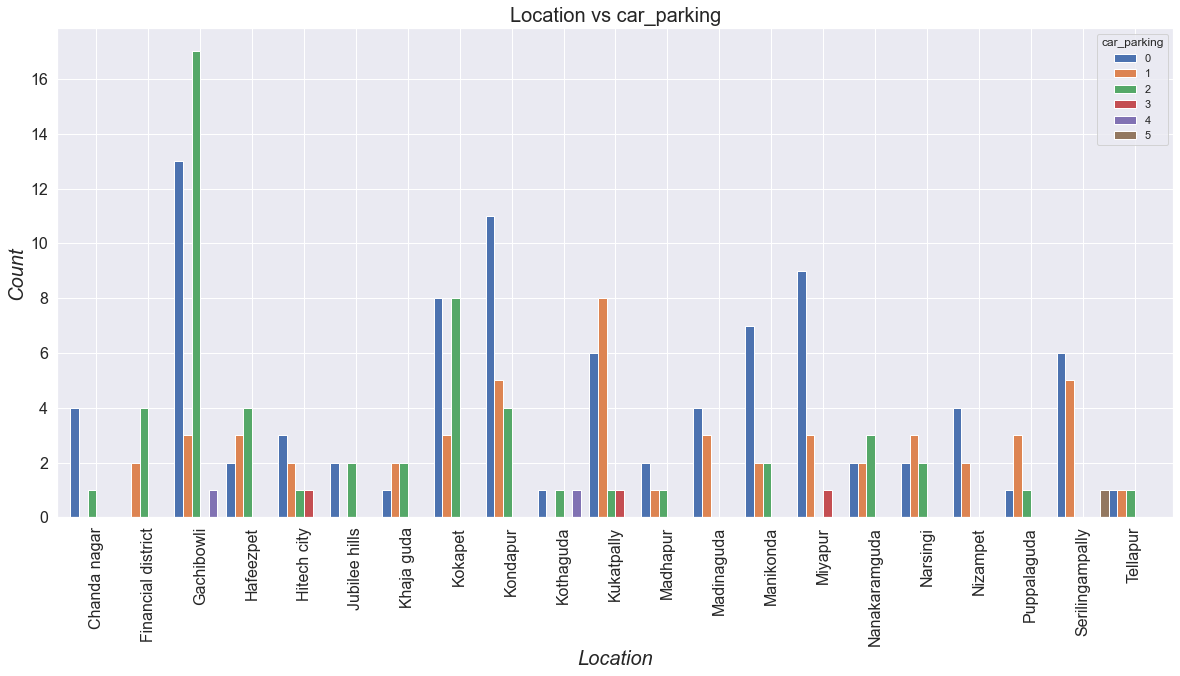

In [1223]:
ax36=Family_rent.groupby(["Location","car_parking"])["car_parking"].count().unstack().plot(kind="bar",width=1, stacked=False, figsize=(20,9),title="Location vs car_parking",fontsize=(16))
ax36.title.set_size(20)
ax36.set_ylabel("Count",fontdict={'fontsize':20},fontstyle='italic')
ax36.set_xlabel("Location",fontdict={'fontsize':20},fontstyle='italic')
plt.show()

# Conclusion :

## Bachelors(<=20000):
- "Kukatpally"and "Kondapur" are having more no.of Houses available for rent .    
    
    * Average Rent:
      
       - "Tellapur","Madinaguda","Kukatpally","Chanda Nagar","kondapur","Nizampet" are the average lowest      
           location(Rs<15K).
      
     * Furnished_Type:
      
               1. Furnished: "kondapur","Kukatpally","Madinaguda".
               2. semi_furnished:"Kukatpally","kondapur" .
     * BHK- 
               -  1-BHk- "Kukatpally","kondapur" ,"Madinaguda".
               
               -  2BHK- "kondapur","Kukatpally","Nizampet".
     * Car_parking:
     
               -  Each locations are having  atleast 1 or2 parking slot. 
               
**Best location would be "Kukatpally"and "Kondapur", because  most of the requirement for bachelors can be find within low Budget.**

##   Family looking for "Apartments"
- Top 5 location having more no.of Houses for rent are "Gachibowli","Kondapur","Kokapet","Kukatpally","Miyapur".

         
     * Average Rent (location) (<=20000):
     
           "Chanda Nagar","Puppalaguda","Nizampet","Serilingampally","Madinaguda","Miyapur" are the average lowest  
               locations available for rent.
           
           
     * Furnished_Type:
     
                  1.most of the location  are having atleast "semifurnished" and unfurnished.
                  2. Furnished:"Gachibowli","koapet".
                  
     * BHK:
     
               Alomost all the locations are having 3bhk and 2Bhk .
               
     * Bathroom:
     
     
             Each Location has atmost 3 bathrooms.
       
     * Car_parking:
     
                   
                   Most of the locations are having atleast 1 or 2 parking slot.
                   

**If family  is looking for low budget houses for rent , the best location is "Miyapur".If they are looking for little high cost , the best locations are "Gachibowli","Kondapur","Kokapet","Kukatpally" which comes under Rs 40k**